In [0]:
# https://www.datacamp.com/courses/deep-learning-with-keras-in-python

In [0]:
# to display entire numpy array
numpy.set_printoptions(threshold=numpy.inf)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, KFold

In [0]:
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, BatchNormalization, Conv2D,Flatten
from keras.layers import Embedding, LSTM
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing import image
from keras.preprocessing.text import Tokenizer
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import ResNet50, decode_predictions

Using TensorFlow backend.


**Course Description**

Deep learning is here to stay! It's the go-to technique to solve complex problems that arise with unstructured data and an incredible tool for innovation. Keras is one of the frameworks that make it easier to start developing deep learning models, and it's versatile enough to build industry-ready models in no time. In this course, you will learn regression and save the earth by predicting asteroid trajectories, apply binary classification to distinguish between real and fake dollar bills, use multiclass classification to decide who threw which dart at a dart board, learn to use neural networks to reconstruct noisy images and much more. Additionally, you will learn how to better control your models during training and how to tune them to boost their performance.

## 1. Introducing Keras

In this first chapter, you will get introduced to neural networks, understand what kind of problems they can solve, and when to use them. You will also build several networks and save the earth by training a regression model that approximates the orbit of a meteor that is approaching us!


#### Hello nets!

You will build a network that takes two numbers as input, passes them through a hidden layer of 10 neurons, and finally outputs a single non-constrained number.

A **non-constrained output** can be obtained by avoiding setting an activation function in the output layer. This is useful for problems like regression, when we want our output to be able to take any value.

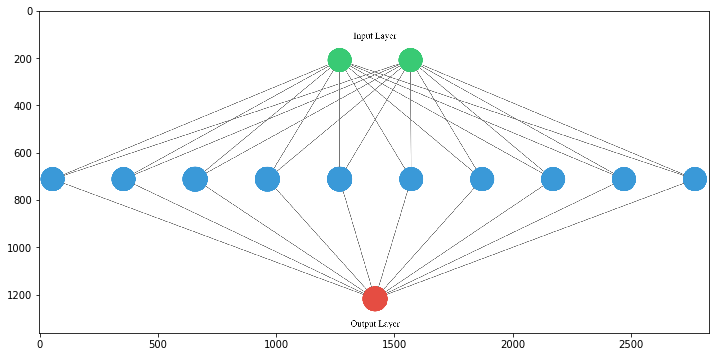

In [0]:
import matplotlib.pyplot as plt
img = plt.imread('hello_nets.png')
fig= plt.figure(figsize=(12,6))
plt.imshow(img)

In [0]:
# Import the Sequential model and Dense layer
from keras.models import Sequential
from keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add an input layer and a hidden layer with 10 neurons
model.add(Dense(10, input_shape=(2,), activation="relu"))

# Add a 1-neuron output layer
model.add(Dense(1))

# Summarise your model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


#### Counting parameters
You've just created a neural network. Create a new one now and take some time to think about the weights of each layer. The Keras Dense layer and the Sequential model are already loaded for you to use.

This is the network you will be creating:

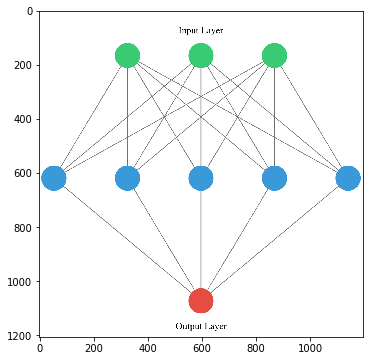

In [0]:
import matplotlib.pyplot as plt
img = plt.imread('counting_parameters.png')
fig= plt.figure(figsize=(8,6))
plt.imshow(img)

In [0]:
# Instantiate a new Sequential model
model = Sequential()

# Add a Dense layer with five neurons and three inputs
model.add(Dense(5, input_shape=(3,), activation="relu"))

# Add a final Dense layer with one neuron and no activation
model.add(Dense(1))

# Summarize your model
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


**Interpret output**

There are 20 parameters, 15 from the connection of our input layer to our hidden layer and 5 from the bias weight of each neuron in the hidden layer.

In [0]:
from keras.models import Sequential
from keras.layers import Dense

# Instantiate a Sequential model
model = Sequential()

# Build the input and hidden layer
model.add(Dense(3, input_shape=(2,)))

# Add the ouput layer
model.add(Dense(1))

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


####Specifying a model
You will build a simple regression model to forecast the orbit of the meteor!

Your training data consist of measurements taken at time steps from -10 minutes before the impact region to +10 minutes after. Each time step can be viewed as an X coordinate in our graph, which has an associated position Y for the meteor at that time step.

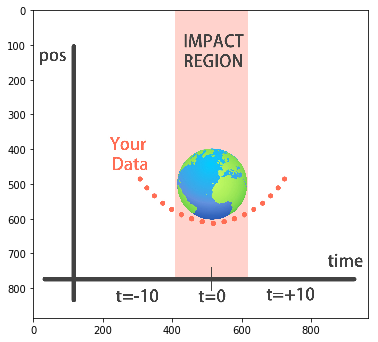

In [0]:
import matplotlib.pyplot as plt
img = plt.imread('meteor_orbit_3.jpg')
fig= plt.figure(figsize=(6,6))
plt.imshow(img)

This data is stored in two numpy arrays: one called time_steps , containing the features, and another called y_positions, with the labels.

In [0]:
#@title
time_steps = np.array([-1.00000000e+01, -9.98999500e+00, -9.97998999e+00, -9.96998499e+00,
       -9.95997999e+00, -9.94997499e+00, -9.93996998e+00, -9.92996498e+00,
       -9.91995998e+00, -9.90995498e+00, -9.89994997e+00, -9.88994497e+00,
       -9.87993997e+00, -9.86993497e+00, -9.85992996e+00, -9.84992496e+00,
       -9.83991996e+00, -9.82991496e+00, -9.81990995e+00, -9.80990495e+00,
       -9.79989995e+00, -9.78989495e+00, -9.77988994e+00, -9.76988494e+00,
       -9.75987994e+00, -9.74987494e+00, -9.73986993e+00, -9.72986493e+00,
       -9.71985993e+00, -9.70985493e+00, -9.69984992e+00, -9.68984492e+00,
       -9.67983992e+00, -9.66983492e+00, -9.65982991e+00, -9.64982491e+00,
       -9.63981991e+00, -9.62981491e+00, -9.61980990e+00, -9.60980490e+00,
       -9.59979990e+00, -9.58979490e+00, -9.57978989e+00, -9.56978489e+00,
       -9.55977989e+00, -9.54977489e+00, -9.53976988e+00, -9.52976488e+00,
       -9.51975988e+00, -9.50975488e+00, -9.49974987e+00, -9.48974487e+00,
       -9.47973987e+00, -9.46973487e+00, -9.45972986e+00, -9.44972486e+00,
       -9.43971986e+00, -9.42971486e+00, -9.41970985e+00, -9.40970485e+00,
       -9.39969985e+00, -9.38969485e+00, -9.37968984e+00, -9.36968484e+00,
       -9.35967984e+00, -9.34967484e+00, -9.33966983e+00, -9.32966483e+00,
       -9.31965983e+00, -9.30965483e+00, -9.29964982e+00, -9.28964482e+00,
       -9.27963982e+00, -9.26963482e+00, -9.25962981e+00, -9.24962481e+00,
       -9.23961981e+00, -9.22961481e+00, -9.21960980e+00, -9.20960480e+00,
       -9.19959980e+00, -9.18959480e+00, -9.17958979e+00, -9.16958479e+00,
       -9.15957979e+00, -9.14957479e+00, -9.13956978e+00, -9.12956478e+00,
       -9.11955978e+00, -9.10955478e+00, -9.09954977e+00, -9.08954477e+00,
       -9.07953977e+00, -9.06953477e+00, -9.05952976e+00, -9.04952476e+00,
       -9.03951976e+00, -9.02951476e+00, -9.01950975e+00, -9.00950475e+00,
       -8.99949975e+00, -8.98949475e+00, -8.97948974e+00, -8.96948474e+00,
       -8.95947974e+00, -8.94947474e+00, -8.93946973e+00, -8.92946473e+00,
       -8.91945973e+00, -8.90945473e+00, -8.89944972e+00, -8.88944472e+00,
       -8.87943972e+00, -8.86943472e+00, -8.85942971e+00, -8.84942471e+00,
       -8.83941971e+00, -8.82941471e+00, -8.81940970e+00, -8.80940470e+00,
       -8.79939970e+00, -8.78939470e+00, -8.77938969e+00, -8.76938469e+00,
       -8.75937969e+00, -8.74937469e+00, -8.73936968e+00, -8.72936468e+00,
       -8.71935968e+00, -8.70935468e+00, -8.69934967e+00, -8.68934467e+00,
       -8.67933967e+00, -8.66933467e+00, -8.65932966e+00, -8.64932466e+00,
       -8.63931966e+00, -8.62931466e+00, -8.61930965e+00, -8.60930465e+00,
       -8.59929965e+00, -8.58929465e+00, -8.57928964e+00, -8.56928464e+00,
       -8.55927964e+00, -8.54927464e+00, -8.53926963e+00, -8.52926463e+00,
       -8.51925963e+00, -8.50925463e+00, -8.49924962e+00, -8.48924462e+00,
       -8.47923962e+00, -8.46923462e+00, -8.45922961e+00, -8.44922461e+00,
       -8.43921961e+00, -8.42921461e+00, -8.41920960e+00, -8.40920460e+00,
       -8.39919960e+00, -8.38919460e+00, -8.37918959e+00, -8.36918459e+00,
       -8.35917959e+00, -8.34917459e+00, -8.33916958e+00, -8.32916458e+00,
       -8.31915958e+00, -8.30915458e+00, -8.29914957e+00, -8.28914457e+00,
       -8.27913957e+00, -8.26913457e+00, -8.25912956e+00, -8.24912456e+00,
       -8.23911956e+00, -8.22911456e+00, -8.21910955e+00, -8.20910455e+00,
       -8.19909955e+00, -8.18909455e+00, -8.17908954e+00, -8.16908454e+00,
       -8.15907954e+00, -8.14907454e+00, -8.13906953e+00, -8.12906453e+00,
       -8.11905953e+00, -8.10905453e+00, -8.09904952e+00, -8.08904452e+00,
       -8.07903952e+00, -8.06903452e+00, -8.05902951e+00, -8.04902451e+00,
       -8.03901951e+00, -8.02901451e+00, -8.01900950e+00, -8.00900450e+00,
       -7.99899950e+00, -7.98899450e+00, -7.97898949e+00, -7.96898449e+00,
       -7.95897949e+00, -7.94897449e+00, -7.93896948e+00, -7.92896448e+00,
       -7.91895948e+00, -7.90895448e+00, -7.89894947e+00, -7.88894447e+00,
       -7.87893947e+00, -7.86893447e+00, -7.85892946e+00, -7.84892446e+00,
       -7.83891946e+00, -7.82891446e+00, -7.81890945e+00, -7.80890445e+00,
       -7.79889945e+00, -7.78889445e+00, -7.77888944e+00, -7.76888444e+00,
       -7.75887944e+00, -7.74887444e+00, -7.73886943e+00, -7.72886443e+00,
       -7.71885943e+00, -7.70885443e+00, -7.69884942e+00, -7.68884442e+00,
       -7.67883942e+00, -7.66883442e+00, -7.65882941e+00, -7.64882441e+00,
       -7.63881941e+00, -7.62881441e+00, -7.61880940e+00, -7.60880440e+00,
       -7.59879940e+00, -7.58879440e+00, -7.57878939e+00, -7.56878439e+00,
       -7.55877939e+00, -7.54877439e+00, -7.53876938e+00, -7.52876438e+00,
       -7.51875938e+00, -7.50875438e+00, -7.49874937e+00, -7.48874437e+00,
       -7.47873937e+00, -7.46873437e+00, -7.45872936e+00, -7.44872436e+00,
       -7.43871936e+00, -7.42871436e+00, -7.41870935e+00, -7.40870435e+00,
       -7.39869935e+00, -7.38869435e+00, -7.37868934e+00, -7.36868434e+00,
       -7.35867934e+00, -7.34867434e+00, -7.33866933e+00, -7.32866433e+00,
       -7.31865933e+00, -7.30865433e+00, -7.29864932e+00, -7.28864432e+00,
       -7.27863932e+00, -7.26863432e+00, -7.25862931e+00, -7.24862431e+00,
       -7.23861931e+00, -7.22861431e+00, -7.21860930e+00, -7.20860430e+00,
       -7.19859930e+00, -7.18859430e+00, -7.17858929e+00, -7.16858429e+00,
       -7.15857929e+00, -7.14857429e+00, -7.13856928e+00, -7.12856428e+00,
       -7.11855928e+00, -7.10855428e+00, -7.09854927e+00, -7.08854427e+00,
       -7.07853927e+00, -7.06853427e+00, -7.05852926e+00, -7.04852426e+00,
       -7.03851926e+00, -7.02851426e+00, -7.01850925e+00, -7.00850425e+00,
       -6.99849925e+00, -6.98849425e+00, -6.97848924e+00, -6.96848424e+00,
       -6.95847924e+00, -6.94847424e+00, -6.93846923e+00, -6.92846423e+00,
       -6.91845923e+00, -6.90845423e+00, -6.89844922e+00, -6.88844422e+00,
       -6.87843922e+00, -6.86843422e+00, -6.85842921e+00, -6.84842421e+00,
       -6.83841921e+00, -6.82841421e+00, -6.81840920e+00, -6.80840420e+00,
       -6.79839920e+00, -6.78839420e+00, -6.77838919e+00, -6.76838419e+00,
       -6.75837919e+00, -6.74837419e+00, -6.73836918e+00, -6.72836418e+00,
       -6.71835918e+00, -6.70835418e+00, -6.69834917e+00, -6.68834417e+00,
       -6.67833917e+00, -6.66833417e+00, -6.65832916e+00, -6.64832416e+00,
       -6.63831916e+00, -6.62831416e+00, -6.61830915e+00, -6.60830415e+00,
       -6.59829915e+00, -6.58829415e+00, -6.57828914e+00, -6.56828414e+00,
       -6.55827914e+00, -6.54827414e+00, -6.53826913e+00, -6.52826413e+00,
       -6.51825913e+00, -6.50825413e+00, -6.49824912e+00, -6.48824412e+00,
       -6.47823912e+00, -6.46823412e+00, -6.45822911e+00, -6.44822411e+00,
       -6.43821911e+00, -6.42821411e+00, -6.41820910e+00, -6.40820410e+00,
       -6.39819910e+00, -6.38819410e+00, -6.37818909e+00, -6.36818409e+00,
       -6.35817909e+00, -6.34817409e+00, -6.33816908e+00, -6.32816408e+00,
       -6.31815908e+00, -6.30815408e+00, -6.29814907e+00, -6.28814407e+00,
       -6.27813907e+00, -6.26813407e+00, -6.25812906e+00, -6.24812406e+00,
       -6.23811906e+00, -6.22811406e+00, -6.21810905e+00, -6.20810405e+00,
       -6.19809905e+00, -6.18809405e+00, -6.17808904e+00, -6.16808404e+00,
       -6.15807904e+00, -6.14807404e+00, -6.13806903e+00, -6.12806403e+00,
       -6.11805903e+00, -6.10805403e+00, -6.09804902e+00, -6.08804402e+00,
       -6.07803902e+00, -6.06803402e+00, -6.05802901e+00, -6.04802401e+00,
       -6.03801901e+00, -6.02801401e+00, -6.01800900e+00, -6.00800400e+00,
       -5.99799900e+00, -5.98799400e+00, -5.97798899e+00, -5.96798399e+00,
       -5.95797899e+00, -5.94797399e+00, -5.93796898e+00, -5.92796398e+00,
       -5.91795898e+00, -5.90795398e+00, -5.89794897e+00, -5.88794397e+00,
       -5.87793897e+00, -5.86793397e+00, -5.85792896e+00, -5.84792396e+00,
       -5.83791896e+00, -5.82791396e+00, -5.81790895e+00, -5.80790395e+00,
       -5.79789895e+00, -5.78789395e+00, -5.77788894e+00, -5.76788394e+00,
       -5.75787894e+00, -5.74787394e+00, -5.73786893e+00, -5.72786393e+00,
       -5.71785893e+00, -5.70785393e+00, -5.69784892e+00, -5.68784392e+00,
       -5.67783892e+00, -5.66783392e+00, -5.65782891e+00, -5.64782391e+00,
       -5.63781891e+00, -5.62781391e+00, -5.61780890e+00, -5.60780390e+00,
       -5.59779890e+00, -5.58779390e+00, -5.57778889e+00, -5.56778389e+00,
       -5.55777889e+00, -5.54777389e+00, -5.53776888e+00, -5.52776388e+00,
       -5.51775888e+00, -5.50775388e+00, -5.49774887e+00, -5.48774387e+00,
       -5.47773887e+00, -5.46773387e+00, -5.45772886e+00, -5.44772386e+00,
       -5.43771886e+00, -5.42771386e+00, -5.41770885e+00, -5.40770385e+00,
       -5.39769885e+00, -5.38769385e+00, -5.37768884e+00, -5.36768384e+00,
       -5.35767884e+00, -5.34767384e+00, -5.33766883e+00, -5.32766383e+00,
       -5.31765883e+00, -5.30765383e+00, -5.29764882e+00, -5.28764382e+00,
       -5.27763882e+00, -5.26763382e+00, -5.25762881e+00, -5.24762381e+00,
       -5.23761881e+00, -5.22761381e+00, -5.21760880e+00, -5.20760380e+00,
       -5.19759880e+00, -5.18759380e+00, -5.17758879e+00, -5.16758379e+00,
       -5.15757879e+00, -5.14757379e+00, -5.13756878e+00, -5.12756378e+00,
       -5.11755878e+00, -5.10755378e+00, -5.09754877e+00, -5.08754377e+00,
       -5.07753877e+00, -5.06753377e+00, -5.05752876e+00, -5.04752376e+00,
       -5.03751876e+00, -5.02751376e+00, -5.01750875e+00, -5.00750375e+00,
       -4.99749875e+00, -4.98749375e+00, -4.97748874e+00, -4.96748374e+00,
       -4.95747874e+00, -4.94747374e+00, -4.93746873e+00, -4.92746373e+00,
       -4.91745873e+00, -4.90745373e+00, -4.89744872e+00, -4.88744372e+00,
       -4.87743872e+00, -4.86743372e+00, -4.85742871e+00, -4.84742371e+00,
       -4.83741871e+00, -4.82741371e+00, -4.81740870e+00, -4.80740370e+00,
       -4.79739870e+00, -4.78739370e+00, -4.77738869e+00, -4.76738369e+00,
       -4.75737869e+00, -4.74737369e+00, -4.73736868e+00, -4.72736368e+00,
       -4.71735868e+00, -4.70735368e+00, -4.69734867e+00, -4.68734367e+00,
       -4.67733867e+00, -4.66733367e+00, -4.65732866e+00, -4.64732366e+00,
       -4.63731866e+00, -4.62731366e+00, -4.61730865e+00, -4.60730365e+00,
       -4.59729865e+00, -4.58729365e+00, -4.57728864e+00, -4.56728364e+00,
       -4.55727864e+00, -4.54727364e+00, -4.53726863e+00, -4.52726363e+00,
       -4.51725863e+00, -4.50725363e+00, -4.49724862e+00, -4.48724362e+00,
       -4.47723862e+00, -4.46723362e+00, -4.45722861e+00, -4.44722361e+00,
       -4.43721861e+00, -4.42721361e+00, -4.41720860e+00, -4.40720360e+00,
       -4.39719860e+00, -4.38719360e+00, -4.37718859e+00, -4.36718359e+00,
       -4.35717859e+00, -4.34717359e+00, -4.33716858e+00, -4.32716358e+00,
       -4.31715858e+00, -4.30715358e+00, -4.29714857e+00, -4.28714357e+00,
       -4.27713857e+00, -4.26713357e+00, -4.25712856e+00, -4.24712356e+00,
       -4.23711856e+00, -4.22711356e+00, -4.21710855e+00, -4.20710355e+00,
       -4.19709855e+00, -4.18709355e+00, -4.17708854e+00, -4.16708354e+00,
       -4.15707854e+00, -4.14707354e+00, -4.13706853e+00, -4.12706353e+00,
       -4.11705853e+00, -4.10705353e+00, -4.09704852e+00, -4.08704352e+00,
       -4.07703852e+00, -4.06703352e+00, -4.05702851e+00, -4.04702351e+00,
       -4.03701851e+00, -4.02701351e+00, -4.01700850e+00, -4.00700350e+00,
       -3.99699850e+00, -3.98699350e+00, -3.97698849e+00, -3.96698349e+00,
       -3.95697849e+00, -3.94697349e+00, -3.93696848e+00, -3.92696348e+00,
       -3.91695848e+00, -3.90695348e+00, -3.89694847e+00, -3.88694347e+00,
       -3.87693847e+00, -3.86693347e+00, -3.85692846e+00, -3.84692346e+00,
       -3.83691846e+00, -3.82691346e+00, -3.81690845e+00, -3.80690345e+00,
       -3.79689845e+00, -3.78689345e+00, -3.77688844e+00, -3.76688344e+00,
       -3.75687844e+00, -3.74687344e+00, -3.73686843e+00, -3.72686343e+00,
       -3.71685843e+00, -3.70685343e+00, -3.69684842e+00, -3.68684342e+00,
       -3.67683842e+00, -3.66683342e+00, -3.65682841e+00, -3.64682341e+00,
       -3.63681841e+00, -3.62681341e+00, -3.61680840e+00, -3.60680340e+00,
       -3.59679840e+00, -3.58679340e+00, -3.57678839e+00, -3.56678339e+00,
       -3.55677839e+00, -3.54677339e+00, -3.53676838e+00, -3.52676338e+00,
       -3.51675838e+00, -3.50675338e+00, -3.49674837e+00, -3.48674337e+00,
       -3.47673837e+00, -3.46673337e+00, -3.45672836e+00, -3.44672336e+00,
       -3.43671836e+00, -3.42671336e+00, -3.41670835e+00, -3.40670335e+00,
       -3.39669835e+00, -3.38669335e+00, -3.37668834e+00, -3.36668334e+00,
       -3.35667834e+00, -3.34667334e+00, -3.33666833e+00, -3.32666333e+00,
       -3.31665833e+00, -3.30665333e+00, -3.29664832e+00, -3.28664332e+00,
       -3.27663832e+00, -3.26663332e+00, -3.25662831e+00, -3.24662331e+00,
       -3.23661831e+00, -3.22661331e+00, -3.21660830e+00, -3.20660330e+00,
       -3.19659830e+00, -3.18659330e+00, -3.17658829e+00, -3.16658329e+00,
       -3.15657829e+00, -3.14657329e+00, -3.13656828e+00, -3.12656328e+00,
       -3.11655828e+00, -3.10655328e+00, -3.09654827e+00, -3.08654327e+00,
       -3.07653827e+00, -3.06653327e+00, -3.05652826e+00, -3.04652326e+00,
       -3.03651826e+00, -3.02651326e+00, -3.01650825e+00, -3.00650325e+00,
       -2.99649825e+00, -2.98649325e+00, -2.97648824e+00, -2.96648324e+00,
       -2.95647824e+00, -2.94647324e+00, -2.93646823e+00, -2.92646323e+00,
       -2.91645823e+00, -2.90645323e+00, -2.89644822e+00, -2.88644322e+00,
       -2.87643822e+00, -2.86643322e+00, -2.85642821e+00, -2.84642321e+00,
       -2.83641821e+00, -2.82641321e+00, -2.81640820e+00, -2.80640320e+00,
       -2.79639820e+00, -2.78639320e+00, -2.77638819e+00, -2.76638319e+00,
       -2.75637819e+00, -2.74637319e+00, -2.73636818e+00, -2.72636318e+00,
       -2.71635818e+00, -2.70635318e+00, -2.69634817e+00, -2.68634317e+00,
       -2.67633817e+00, -2.66633317e+00, -2.65632816e+00, -2.64632316e+00,
       -2.63631816e+00, -2.62631316e+00, -2.61630815e+00, -2.60630315e+00,
       -2.59629815e+00, -2.58629315e+00, -2.57628814e+00, -2.56628314e+00,
       -2.55627814e+00, -2.54627314e+00, -2.53626813e+00, -2.52626313e+00,
       -2.51625813e+00, -2.50625313e+00, -2.49624812e+00, -2.48624312e+00,
       -2.47623812e+00, -2.46623312e+00, -2.45622811e+00, -2.44622311e+00,
       -2.43621811e+00, -2.42621311e+00, -2.41620810e+00, -2.40620310e+00,
       -2.39619810e+00, -2.38619310e+00, -2.37618809e+00, -2.36618309e+00,
       -2.35617809e+00, -2.34617309e+00, -2.33616808e+00, -2.32616308e+00,
       -2.31615808e+00, -2.30615308e+00, -2.29614807e+00, -2.28614307e+00,
       -2.27613807e+00, -2.26613307e+00, -2.25612806e+00, -2.24612306e+00,
       -2.23611806e+00, -2.22611306e+00, -2.21610805e+00, -2.20610305e+00,
       -2.19609805e+00, -2.18609305e+00, -2.17608804e+00, -2.16608304e+00,
       -2.15607804e+00, -2.14607304e+00, -2.13606803e+00, -2.12606303e+00,
       -2.11605803e+00, -2.10605303e+00, -2.09604802e+00, -2.08604302e+00,
       -2.07603802e+00, -2.06603302e+00, -2.05602801e+00, -2.04602301e+00,
       -2.03601801e+00, -2.02601301e+00, -2.01600800e+00, -2.00600300e+00,
       -1.99599800e+00, -1.98599300e+00, -1.97598799e+00, -1.96598299e+00,
       -1.95597799e+00, -1.94597299e+00, -1.93596798e+00, -1.92596298e+00,
       -1.91595798e+00, -1.90595298e+00, -1.89594797e+00, -1.88594297e+00,
       -1.87593797e+00, -1.86593297e+00, -1.85592796e+00, -1.84592296e+00,
       -1.83591796e+00, -1.82591296e+00, -1.81590795e+00, -1.80590295e+00,
       -1.79589795e+00, -1.78589295e+00, -1.77588794e+00, -1.76588294e+00,
       -1.75587794e+00, -1.74587294e+00, -1.73586793e+00, -1.72586293e+00,
       -1.71585793e+00, -1.70585293e+00, -1.69584792e+00, -1.68584292e+00,
       -1.67583792e+00, -1.66583292e+00, -1.65582791e+00, -1.64582291e+00,
       -1.63581791e+00, -1.62581291e+00, -1.61580790e+00, -1.60580290e+00,
       -1.59579790e+00, -1.58579290e+00, -1.57578789e+00, -1.56578289e+00,
       -1.55577789e+00, -1.54577289e+00, -1.53576788e+00, -1.52576288e+00,
       -1.51575788e+00, -1.50575288e+00, -1.49574787e+00, -1.48574287e+00,
       -1.47573787e+00, -1.46573287e+00, -1.45572786e+00, -1.44572286e+00,
       -1.43571786e+00, -1.42571286e+00, -1.41570785e+00, -1.40570285e+00,
       -1.39569785e+00, -1.38569285e+00, -1.37568784e+00, -1.36568284e+00,
       -1.35567784e+00, -1.34567284e+00, -1.33566783e+00, -1.32566283e+00,
       -1.31565783e+00, -1.30565283e+00, -1.29564782e+00, -1.28564282e+00,
       -1.27563782e+00, -1.26563282e+00, -1.25562781e+00, -1.24562281e+00,
       -1.23561781e+00, -1.22561281e+00, -1.21560780e+00, -1.20560280e+00,
       -1.19559780e+00, -1.18559280e+00, -1.17558779e+00, -1.16558279e+00,
       -1.15557779e+00, -1.14557279e+00, -1.13556778e+00, -1.12556278e+00,
       -1.11555778e+00, -1.10555278e+00, -1.09554777e+00, -1.08554277e+00,
       -1.07553777e+00, -1.06553277e+00, -1.05552776e+00, -1.04552276e+00,
       -1.03551776e+00, -1.02551276e+00, -1.01550775e+00, -1.00550275e+00,
       -9.95497749e-01, -9.85492746e-01, -9.75487744e-01, -9.65482741e-01,
       -9.55477739e-01, -9.45472736e-01, -9.35467734e-01, -9.25462731e-01,
       -9.15457729e-01, -9.05452726e-01, -8.95447724e-01, -8.85442721e-01,
       -8.75437719e-01, -8.65432716e-01, -8.55427714e-01, -8.45422711e-01,
       -8.35417709e-01, -8.25412706e-01, -8.15407704e-01, -8.05402701e-01,
       -7.95397699e-01, -7.85392696e-01, -7.75387694e-01, -7.65382691e-01,
       -7.55377689e-01, -7.45372686e-01, -7.35367684e-01, -7.25362681e-01,
       -7.15357679e-01, -7.05352676e-01, -6.95347674e-01, -6.85342671e-01,
       -6.75337669e-01, -6.65332666e-01, -6.55327664e-01, -6.45322661e-01,
       -6.35317659e-01, -6.25312656e-01, -6.15307654e-01, -6.05302651e-01,
       -5.95297649e-01, -5.85292646e-01, -5.75287644e-01, -5.65282641e-01,
       -5.55277639e-01, -5.45272636e-01, -5.35267634e-01, -5.25262631e-01,
       -5.15257629e-01, -5.05252626e-01, -4.95247624e-01, -4.85242621e-01,
       -4.75237619e-01, -4.65232616e-01, -4.55227614e-01, -4.45222611e-01,
       -4.35217609e-01, -4.25212606e-01, -4.15207604e-01, -4.05202601e-01,
       -3.95197599e-01, -3.85192596e-01, -3.75187594e-01, -3.65182591e-01,
       -3.55177589e-01, -3.45172586e-01, -3.35167584e-01, -3.25162581e-01,
       -3.15157579e-01, -3.05152576e-01, -2.95147574e-01, -2.85142571e-01,
       -2.75137569e-01, -2.65132566e-01, -2.55127564e-01, -2.45122561e-01,
       -2.35117559e-01, -2.25112556e-01, -2.15107554e-01, -2.05102551e-01,
       -1.95097549e-01, -1.85092546e-01, -1.75087544e-01, -1.65082541e-01,
       -1.55077539e-01, -1.45072536e-01, -1.35067534e-01, -1.25062531e-01,
       -1.15057529e-01, -1.05052526e-01, -9.50475238e-02, -8.50425213e-02,
       -7.50375188e-02, -6.50325163e-02, -5.50275138e-02, -4.50225113e-02,
       -3.50175088e-02, -2.50125063e-02, -1.50075038e-02, -5.00250125e-03,
        5.00250125e-03,  1.50075038e-02,  2.50125063e-02,  3.50175088e-02,
        4.50225113e-02,  5.50275138e-02,  6.50325163e-02,  7.50375188e-02,
        8.50425213e-02,  9.50475238e-02,  1.05052526e-01,  1.15057529e-01,
        1.25062531e-01,  1.35067534e-01,  1.45072536e-01,  1.55077539e-01,
        1.65082541e-01,  1.75087544e-01,  1.85092546e-01,  1.95097549e-01,
        2.05102551e-01,  2.15107554e-01,  2.25112556e-01,  2.35117559e-01,
        2.45122561e-01,  2.55127564e-01,  2.65132566e-01,  2.75137569e-01,
        2.85142571e-01,  2.95147574e-01,  3.05152576e-01,  3.15157579e-01,
        3.25162581e-01,  3.35167584e-01,  3.45172586e-01,  3.55177589e-01,
        3.65182591e-01,  3.75187594e-01,  3.85192596e-01,  3.95197599e-01,
        4.05202601e-01,  4.15207604e-01,  4.25212606e-01,  4.35217609e-01,
        4.45222611e-01,  4.55227614e-01,  4.65232616e-01,  4.75237619e-01,
        4.85242621e-01,  4.95247624e-01,  5.05252626e-01,  5.15257629e-01,
        5.25262631e-01,  5.35267634e-01,  5.45272636e-01,  5.55277639e-01,
        5.65282641e-01,  5.75287644e-01,  5.85292646e-01,  5.95297649e-01,
        6.05302651e-01,  6.15307654e-01,  6.25312656e-01,  6.35317659e-01,
        6.45322661e-01,  6.55327664e-01,  6.65332666e-01,  6.75337669e-01,
        6.85342671e-01,  6.95347674e-01,  7.05352676e-01,  7.15357679e-01,
        7.25362681e-01,  7.35367684e-01,  7.45372686e-01,  7.55377689e-01,
        7.65382691e-01,  7.75387694e-01,  7.85392696e-01,  7.95397699e-01,
        8.05402701e-01,  8.15407704e-01,  8.25412706e-01,  8.35417709e-01,
        8.45422711e-01,  8.55427714e-01,  8.65432716e-01,  8.75437719e-01,
        8.85442721e-01,  8.95447724e-01,  9.05452726e-01,  9.15457729e-01,
        9.25462731e-01,  9.35467734e-01,  9.45472736e-01,  9.55477739e-01,
        9.65482741e-01,  9.75487744e-01,  9.85492746e-01,  9.95497749e-01,
        1.00550275e+00,  1.01550775e+00,  1.02551276e+00,  1.03551776e+00,
        1.04552276e+00,  1.05552776e+00,  1.06553277e+00,  1.07553777e+00,
        1.08554277e+00,  1.09554777e+00,  1.10555278e+00,  1.11555778e+00,
        1.12556278e+00,  1.13556778e+00,  1.14557279e+00,  1.15557779e+00,
        1.16558279e+00,  1.17558779e+00,  1.18559280e+00,  1.19559780e+00,
        1.20560280e+00,  1.21560780e+00,  1.22561281e+00,  1.23561781e+00,
        1.24562281e+00,  1.25562781e+00,  1.26563282e+00,  1.27563782e+00,
        1.28564282e+00,  1.29564782e+00,  1.30565283e+00,  1.31565783e+00,
        1.32566283e+00,  1.33566783e+00,  1.34567284e+00,  1.35567784e+00,
        1.36568284e+00,  1.37568784e+00,  1.38569285e+00,  1.39569785e+00,
        1.40570285e+00,  1.41570785e+00,  1.42571286e+00,  1.43571786e+00,
        1.44572286e+00,  1.45572786e+00,  1.46573287e+00,  1.47573787e+00,
        1.48574287e+00,  1.49574787e+00,  1.50575288e+00,  1.51575788e+00,
        1.52576288e+00,  1.53576788e+00,  1.54577289e+00,  1.55577789e+00,
        1.56578289e+00,  1.57578789e+00,  1.58579290e+00,  1.59579790e+00,
        1.60580290e+00,  1.61580790e+00,  1.62581291e+00,  1.63581791e+00,
        1.64582291e+00,  1.65582791e+00,  1.66583292e+00,  1.67583792e+00,
        1.68584292e+00,  1.69584792e+00,  1.70585293e+00,  1.71585793e+00,
        1.72586293e+00,  1.73586793e+00,  1.74587294e+00,  1.75587794e+00,
        1.76588294e+00,  1.77588794e+00,  1.78589295e+00,  1.79589795e+00,
        1.80590295e+00,  1.81590795e+00,  1.82591296e+00,  1.83591796e+00,
        1.84592296e+00,  1.85592796e+00,  1.86593297e+00,  1.87593797e+00,
        1.88594297e+00,  1.89594797e+00,  1.90595298e+00,  1.91595798e+00,
        1.92596298e+00,  1.93596798e+00,  1.94597299e+00,  1.95597799e+00,
        1.96598299e+00,  1.97598799e+00,  1.98599300e+00,  1.99599800e+00,
        2.00600300e+00,  2.01600800e+00,  2.02601301e+00,  2.03601801e+00,
        2.04602301e+00,  2.05602801e+00,  2.06603302e+00,  2.07603802e+00,
        2.08604302e+00,  2.09604802e+00,  2.10605303e+00,  2.11605803e+00,
        2.12606303e+00,  2.13606803e+00,  2.14607304e+00,  2.15607804e+00,
        2.16608304e+00,  2.17608804e+00,  2.18609305e+00,  2.19609805e+00,
        2.20610305e+00,  2.21610805e+00,  2.22611306e+00,  2.23611806e+00,
        2.24612306e+00,  2.25612806e+00,  2.26613307e+00,  2.27613807e+00,
        2.28614307e+00,  2.29614807e+00,  2.30615308e+00,  2.31615808e+00,
        2.32616308e+00,  2.33616808e+00,  2.34617309e+00,  2.35617809e+00,
        2.36618309e+00,  2.37618809e+00,  2.38619310e+00,  2.39619810e+00,
        2.40620310e+00,  2.41620810e+00,  2.42621311e+00,  2.43621811e+00,
        2.44622311e+00,  2.45622811e+00,  2.46623312e+00,  2.47623812e+00,
        2.48624312e+00,  2.49624812e+00,  2.50625313e+00,  2.51625813e+00,
        2.52626313e+00,  2.53626813e+00,  2.54627314e+00,  2.55627814e+00,
        2.56628314e+00,  2.57628814e+00,  2.58629315e+00,  2.59629815e+00,
        2.60630315e+00,  2.61630815e+00,  2.62631316e+00,  2.63631816e+00,
        2.64632316e+00,  2.65632816e+00,  2.66633317e+00,  2.67633817e+00,
        2.68634317e+00,  2.69634817e+00,  2.70635318e+00,  2.71635818e+00,
        2.72636318e+00,  2.73636818e+00,  2.74637319e+00,  2.75637819e+00,
        2.76638319e+00,  2.77638819e+00,  2.78639320e+00,  2.79639820e+00,
        2.80640320e+00,  2.81640820e+00,  2.82641321e+00,  2.83641821e+00,
        2.84642321e+00,  2.85642821e+00,  2.86643322e+00,  2.87643822e+00,
        2.88644322e+00,  2.89644822e+00,  2.90645323e+00,  2.91645823e+00,
        2.92646323e+00,  2.93646823e+00,  2.94647324e+00,  2.95647824e+00,
        2.96648324e+00,  2.97648824e+00,  2.98649325e+00,  2.99649825e+00,
        3.00650325e+00,  3.01650825e+00,  3.02651326e+00,  3.03651826e+00,
        3.04652326e+00,  3.05652826e+00,  3.06653327e+00,  3.07653827e+00,
        3.08654327e+00,  3.09654827e+00,  3.10655328e+00,  3.11655828e+00,
        3.12656328e+00,  3.13656828e+00,  3.14657329e+00,  3.15657829e+00,
        3.16658329e+00,  3.17658829e+00,  3.18659330e+00,  3.19659830e+00,
        3.20660330e+00,  3.21660830e+00,  3.22661331e+00,  3.23661831e+00,
        3.24662331e+00,  3.25662831e+00,  3.26663332e+00,  3.27663832e+00,
        3.28664332e+00,  3.29664832e+00,  3.30665333e+00,  3.31665833e+00,
        3.32666333e+00,  3.33666833e+00,  3.34667334e+00,  3.35667834e+00,
        3.36668334e+00,  3.37668834e+00,  3.38669335e+00,  3.39669835e+00,
        3.40670335e+00,  3.41670835e+00,  3.42671336e+00,  3.43671836e+00,
        3.44672336e+00,  3.45672836e+00,  3.46673337e+00,  3.47673837e+00,
        3.48674337e+00,  3.49674837e+00,  3.50675338e+00,  3.51675838e+00,
        3.52676338e+00,  3.53676838e+00,  3.54677339e+00,  3.55677839e+00,
        3.56678339e+00,  3.57678839e+00,  3.58679340e+00,  3.59679840e+00,
        3.60680340e+00,  3.61680840e+00,  3.62681341e+00,  3.63681841e+00,
        3.64682341e+00,  3.65682841e+00,  3.66683342e+00,  3.67683842e+00,
        3.68684342e+00,  3.69684842e+00,  3.70685343e+00,  3.71685843e+00,
        3.72686343e+00,  3.73686843e+00,  3.74687344e+00,  3.75687844e+00,
        3.76688344e+00,  3.77688844e+00,  3.78689345e+00,  3.79689845e+00,
        3.80690345e+00,  3.81690845e+00,  3.82691346e+00,  3.83691846e+00,
        3.84692346e+00,  3.85692846e+00,  3.86693347e+00,  3.87693847e+00,
        3.88694347e+00,  3.89694847e+00,  3.90695348e+00,  3.91695848e+00,
        3.92696348e+00,  3.93696848e+00,  3.94697349e+00,  3.95697849e+00,
        3.96698349e+00,  3.97698849e+00,  3.98699350e+00,  3.99699850e+00,
        4.00700350e+00,  4.01700850e+00,  4.02701351e+00,  4.03701851e+00,
        4.04702351e+00,  4.05702851e+00,  4.06703352e+00,  4.07703852e+00,
        4.08704352e+00,  4.09704852e+00,  4.10705353e+00,  4.11705853e+00,
        4.12706353e+00,  4.13706853e+00,  4.14707354e+00,  4.15707854e+00,
        4.16708354e+00,  4.17708854e+00,  4.18709355e+00,  4.19709855e+00,
        4.20710355e+00,  4.21710855e+00,  4.22711356e+00,  4.23711856e+00,
        4.24712356e+00,  4.25712856e+00,  4.26713357e+00,  4.27713857e+00,
        4.28714357e+00,  4.29714857e+00,  4.30715358e+00,  4.31715858e+00,
        4.32716358e+00,  4.33716858e+00,  4.34717359e+00,  4.35717859e+00,
        4.36718359e+00,  4.37718859e+00,  4.38719360e+00,  4.39719860e+00,
        4.40720360e+00,  4.41720860e+00,  4.42721361e+00,  4.43721861e+00,
        4.44722361e+00,  4.45722861e+00,  4.46723362e+00,  4.47723862e+00,
        4.48724362e+00,  4.49724862e+00,  4.50725363e+00,  4.51725863e+00,
        4.52726363e+00,  4.53726863e+00,  4.54727364e+00,  4.55727864e+00,
        4.56728364e+00,  4.57728864e+00,  4.58729365e+00,  4.59729865e+00,
        4.60730365e+00,  4.61730865e+00,  4.62731366e+00,  4.63731866e+00,
        4.64732366e+00,  4.65732866e+00,  4.66733367e+00,  4.67733867e+00,
        4.68734367e+00,  4.69734867e+00,  4.70735368e+00,  4.71735868e+00,
        4.72736368e+00,  4.73736868e+00,  4.74737369e+00,  4.75737869e+00,
        4.76738369e+00,  4.77738869e+00,  4.78739370e+00,  4.79739870e+00,
        4.80740370e+00,  4.81740870e+00,  4.82741371e+00,  4.83741871e+00,
        4.84742371e+00,  4.85742871e+00,  4.86743372e+00,  4.87743872e+00,
        4.88744372e+00,  4.89744872e+00,  4.90745373e+00,  4.91745873e+00,
        4.92746373e+00,  4.93746873e+00,  4.94747374e+00,  4.95747874e+00,
        4.96748374e+00,  4.97748874e+00,  4.98749375e+00,  4.99749875e+00,
        5.00750375e+00,  5.01750875e+00,  5.02751376e+00,  5.03751876e+00,
        5.04752376e+00,  5.05752876e+00,  5.06753377e+00,  5.07753877e+00,
        5.08754377e+00,  5.09754877e+00,  5.10755378e+00,  5.11755878e+00,
        5.12756378e+00,  5.13756878e+00,  5.14757379e+00,  5.15757879e+00,
        5.16758379e+00,  5.17758879e+00,  5.18759380e+00,  5.19759880e+00,
        5.20760380e+00,  5.21760880e+00,  5.22761381e+00,  5.23761881e+00,
        5.24762381e+00,  5.25762881e+00,  5.26763382e+00,  5.27763882e+00,
        5.28764382e+00,  5.29764882e+00,  5.30765383e+00,  5.31765883e+00,
        5.32766383e+00,  5.33766883e+00,  5.34767384e+00,  5.35767884e+00,
        5.36768384e+00,  5.37768884e+00,  5.38769385e+00,  5.39769885e+00,
        5.40770385e+00,  5.41770885e+00,  5.42771386e+00,  5.43771886e+00,
        5.44772386e+00,  5.45772886e+00,  5.46773387e+00,  5.47773887e+00,
        5.48774387e+00,  5.49774887e+00,  5.50775388e+00,  5.51775888e+00,
        5.52776388e+00,  5.53776888e+00,  5.54777389e+00,  5.55777889e+00,
        5.56778389e+00,  5.57778889e+00,  5.58779390e+00,  5.59779890e+00,
        5.60780390e+00,  5.61780890e+00,  5.62781391e+00,  5.63781891e+00,
        5.64782391e+00,  5.65782891e+00,  5.66783392e+00,  5.67783892e+00,
        5.68784392e+00,  5.69784892e+00,  5.70785393e+00,  5.71785893e+00,
        5.72786393e+00,  5.73786893e+00,  5.74787394e+00,  5.75787894e+00,
        5.76788394e+00,  5.77788894e+00,  5.78789395e+00,  5.79789895e+00,
        5.80790395e+00,  5.81790895e+00,  5.82791396e+00,  5.83791896e+00,
        5.84792396e+00,  5.85792896e+00,  5.86793397e+00,  5.87793897e+00,
        5.88794397e+00,  5.89794897e+00,  5.90795398e+00,  5.91795898e+00,
        5.92796398e+00,  5.93796898e+00,  5.94797399e+00,  5.95797899e+00,
        5.96798399e+00,  5.97798899e+00,  5.98799400e+00,  5.99799900e+00,
        6.00800400e+00,  6.01800900e+00,  6.02801401e+00,  6.03801901e+00,
        6.04802401e+00,  6.05802901e+00,  6.06803402e+00,  6.07803902e+00,
        6.08804402e+00,  6.09804902e+00,  6.10805403e+00,  6.11805903e+00,
        6.12806403e+00,  6.13806903e+00,  6.14807404e+00,  6.15807904e+00,
        6.16808404e+00,  6.17808904e+00,  6.18809405e+00,  6.19809905e+00,
        6.20810405e+00,  6.21810905e+00,  6.22811406e+00,  6.23811906e+00,
        6.24812406e+00,  6.25812906e+00,  6.26813407e+00,  6.27813907e+00,
        6.28814407e+00,  6.29814907e+00,  6.30815408e+00,  6.31815908e+00,
        6.32816408e+00,  6.33816908e+00,  6.34817409e+00,  6.35817909e+00,
        6.36818409e+00,  6.37818909e+00,  6.38819410e+00,  6.39819910e+00,
        6.40820410e+00,  6.41820910e+00,  6.42821411e+00,  6.43821911e+00,
        6.44822411e+00,  6.45822911e+00,  6.46823412e+00,  6.47823912e+00,
        6.48824412e+00,  6.49824912e+00,  6.50825413e+00,  6.51825913e+00,
        6.52826413e+00,  6.53826913e+00,  6.54827414e+00,  6.55827914e+00,
        6.56828414e+00,  6.57828914e+00,  6.58829415e+00,  6.59829915e+00,
        6.60830415e+00,  6.61830915e+00,  6.62831416e+00,  6.63831916e+00,
        6.64832416e+00,  6.65832916e+00,  6.66833417e+00,  6.67833917e+00,
        6.68834417e+00,  6.69834917e+00,  6.70835418e+00,  6.71835918e+00,
        6.72836418e+00,  6.73836918e+00,  6.74837419e+00,  6.75837919e+00,
        6.76838419e+00,  6.77838919e+00,  6.78839420e+00,  6.79839920e+00,
        6.80840420e+00,  6.81840920e+00,  6.82841421e+00,  6.83841921e+00,
        6.84842421e+00,  6.85842921e+00,  6.86843422e+00,  6.87843922e+00,
        6.88844422e+00,  6.89844922e+00,  6.90845423e+00,  6.91845923e+00,
        6.92846423e+00,  6.93846923e+00,  6.94847424e+00,  6.95847924e+00,
        6.96848424e+00,  6.97848924e+00,  6.98849425e+00,  6.99849925e+00,
        7.00850425e+00,  7.01850925e+00,  7.02851426e+00,  7.03851926e+00,
        7.04852426e+00,  7.05852926e+00,  7.06853427e+00,  7.07853927e+00,
        7.08854427e+00,  7.09854927e+00,  7.10855428e+00,  7.11855928e+00,
        7.12856428e+00,  7.13856928e+00,  7.14857429e+00,  7.15857929e+00,
        7.16858429e+00,  7.17858929e+00,  7.18859430e+00,  7.19859930e+00,
        7.20860430e+00,  7.21860930e+00,  7.22861431e+00,  7.23861931e+00,
        7.24862431e+00,  7.25862931e+00,  7.26863432e+00,  7.27863932e+00,
        7.28864432e+00,  7.29864932e+00,  7.30865433e+00,  7.31865933e+00,
        7.32866433e+00,  7.33866933e+00,  7.34867434e+00,  7.35867934e+00,
        7.36868434e+00,  7.37868934e+00,  7.38869435e+00,  7.39869935e+00,
        7.40870435e+00,  7.41870935e+00,  7.42871436e+00,  7.43871936e+00,
        7.44872436e+00,  7.45872936e+00,  7.46873437e+00,  7.47873937e+00,
        7.48874437e+00,  7.49874937e+00,  7.50875438e+00,  7.51875938e+00,
        7.52876438e+00,  7.53876938e+00,  7.54877439e+00,  7.55877939e+00,
        7.56878439e+00,  7.57878939e+00,  7.58879440e+00,  7.59879940e+00,
        7.60880440e+00,  7.61880940e+00,  7.62881441e+00,  7.63881941e+00,
        7.64882441e+00,  7.65882941e+00,  7.66883442e+00,  7.67883942e+00,
        7.68884442e+00,  7.69884942e+00,  7.70885443e+00,  7.71885943e+00,
        7.72886443e+00,  7.73886943e+00,  7.74887444e+00,  7.75887944e+00,
        7.76888444e+00,  7.77888944e+00,  7.78889445e+00,  7.79889945e+00,
        7.80890445e+00,  7.81890945e+00,  7.82891446e+00,  7.83891946e+00,
        7.84892446e+00,  7.85892946e+00,  7.86893447e+00,  7.87893947e+00,
        7.88894447e+00,  7.89894947e+00,  7.90895448e+00,  7.91895948e+00,
        7.92896448e+00,  7.93896948e+00,  7.94897449e+00,  7.95897949e+00,
        7.96898449e+00,  7.97898949e+00,  7.98899450e+00,  7.99899950e+00,
        8.00900450e+00,  8.01900950e+00,  8.02901451e+00,  8.03901951e+00,
        8.04902451e+00,  8.05902951e+00,  8.06903452e+00,  8.07903952e+00,
        8.08904452e+00,  8.09904952e+00,  8.10905453e+00,  8.11905953e+00,
        8.12906453e+00,  8.13906953e+00,  8.14907454e+00,  8.15907954e+00,
        8.16908454e+00,  8.17908954e+00,  8.18909455e+00,  8.19909955e+00,
        8.20910455e+00,  8.21910955e+00,  8.22911456e+00,  8.23911956e+00,
        8.24912456e+00,  8.25912956e+00,  8.26913457e+00,  8.27913957e+00,
        8.28914457e+00,  8.29914957e+00,  8.30915458e+00,  8.31915958e+00,
        8.32916458e+00,  8.33916958e+00,  8.34917459e+00,  8.35917959e+00,
        8.36918459e+00,  8.37918959e+00,  8.38919460e+00,  8.39919960e+00,
        8.40920460e+00,  8.41920960e+00,  8.42921461e+00,  8.43921961e+00,
        8.44922461e+00,  8.45922961e+00,  8.46923462e+00,  8.47923962e+00,
        8.48924462e+00,  8.49924962e+00,  8.50925463e+00,  8.51925963e+00,
        8.52926463e+00,  8.53926963e+00,  8.54927464e+00,  8.55927964e+00,
        8.56928464e+00,  8.57928964e+00,  8.58929465e+00,  8.59929965e+00,
        8.60930465e+00,  8.61930965e+00,  8.62931466e+00,  8.63931966e+00,
        8.64932466e+00,  8.65932966e+00,  8.66933467e+00,  8.67933967e+00,
        8.68934467e+00,  8.69934967e+00,  8.70935468e+00,  8.71935968e+00,
        8.72936468e+00,  8.73936968e+00,  8.74937469e+00,  8.75937969e+00,
        8.76938469e+00,  8.77938969e+00,  8.78939470e+00,  8.79939970e+00,
        8.80940470e+00,  8.81940970e+00,  8.82941471e+00,  8.83941971e+00,
        8.84942471e+00,  8.85942971e+00,  8.86943472e+00,  8.87943972e+00,
        8.88944472e+00,  8.89944972e+00,  8.90945473e+00,  8.91945973e+00,
        8.92946473e+00,  8.93946973e+00,  8.94947474e+00,  8.95947974e+00,
        8.96948474e+00,  8.97948974e+00,  8.98949475e+00,  8.99949975e+00,
        9.00950475e+00,  9.01950975e+00,  9.02951476e+00,  9.03951976e+00,
        9.04952476e+00,  9.05952976e+00,  9.06953477e+00,  9.07953977e+00,
        9.08954477e+00,  9.09954977e+00,  9.10955478e+00,  9.11955978e+00,
        9.12956478e+00,  9.13956978e+00,  9.14957479e+00,  9.15957979e+00,
        9.16958479e+00,  9.17958979e+00,  9.18959480e+00,  9.19959980e+00,
        9.20960480e+00,  9.21960980e+00,  9.22961481e+00,  9.23961981e+00,
        9.24962481e+00,  9.25962981e+00,  9.26963482e+00,  9.27963982e+00,
        9.28964482e+00,  9.29964982e+00,  9.30965483e+00,  9.31965983e+00,
        9.32966483e+00,  9.33966983e+00,  9.34967484e+00,  9.35967984e+00,
        9.36968484e+00,  9.37968984e+00,  9.38969485e+00,  9.39969985e+00,
        9.40970485e+00,  9.41970985e+00,  9.42971486e+00,  9.43971986e+00,
        9.44972486e+00,  9.45972986e+00,  9.46973487e+00,  9.47973987e+00,
        9.48974487e+00,  9.49974987e+00,  9.50975488e+00,  9.51975988e+00,
        9.52976488e+00,  9.53976988e+00,  9.54977489e+00,  9.55977989e+00,
        9.56978489e+00,  9.57978989e+00,  9.58979490e+00,  9.59979990e+00,
        9.60980490e+00,  9.61980990e+00,  9.62981491e+00,  9.63981991e+00,
        9.64982491e+00,  9.65982991e+00,  9.66983492e+00,  9.67983992e+00,
        9.68984492e+00,  9.69984992e+00,  9.70985493e+00,  9.71985993e+00,
        9.72986493e+00,  9.73986993e+00,  9.74987494e+00,  9.75987994e+00,
        9.76988494e+00,  9.77988994e+00,  9.78989495e+00,  9.79989995e+00,
        9.80990495e+00,  9.81990995e+00,  9.82991496e+00,  9.83991996e+00,
        9.84992496e+00,  9.85992996e+00,  9.86993497e+00,  9.87993997e+00,
        9.88994497e+00,  9.89994997e+00,  9.90995498e+00,  9.91995998e+00,
        9.92996498e+00,  9.93996998e+00,  9.94997499e+00,  9.95997999e+00,
        9.96998499e+00,  9.97998999e+00,  9.98999500e+00,  1.00000000e+01])

time_steps.reshape(-1, 1)
print("time_steps length: ", len(time_steps))

time_steps length:  2000


In [0]:
#@title
y_positions = np.array([1.00000000e+02, 9.98000001e+01, 9.96002003e+01, 9.94006008e+01,
       9.92012014e+01, 9.90020023e+01, 9.88030033e+01, 9.86042046e+01,
       9.84056060e+01, 9.82072077e+01, 9.80090095e+01, 9.78110116e+01,
       9.76132138e+01, 9.74156163e+01, 9.72182189e+01, 9.70210218e+01,
       9.68240248e+01, 9.66272281e+01, 9.64306315e+01, 9.62342352e+01,
       9.60380390e+01, 9.58420431e+01, 9.56462473e+01, 9.54506518e+01,
       9.52552564e+01, 9.50600613e+01, 9.48650664e+01, 9.46702716e+01,
       9.44756771e+01, 9.42812827e+01, 9.40870886e+01, 9.38930946e+01,
       9.36993009e+01, 9.35057073e+01, 9.33123140e+01, 9.31191208e+01,
       9.29261279e+01, 9.27333352e+01, 9.25407426e+01, 9.23483503e+01,
       9.21561581e+01, 9.19641662e+01, 9.17723744e+01, 9.15807829e+01,
       9.13893915e+01, 9.11982004e+01, 9.10072095e+01, 9.08164187e+01,
       9.06258282e+01, 9.04354378e+01, 9.02452477e+01, 9.00552577e+01,
       8.98654680e+01, 8.96758785e+01, 8.94864891e+01, 8.92973000e+01,
       8.91083110e+01, 8.89195223e+01, 8.87309338e+01, 8.85425454e+01,
       8.83543573e+01, 8.81663693e+01, 8.79785816e+01, 8.77909940e+01,
       8.76036067e+01, 8.74164196e+01, 8.72294326e+01, 8.70426459e+01,
       8.68560593e+01, 8.66696730e+01, 8.64834869e+01, 8.62975009e+01,
       8.61117152e+01, 8.59261296e+01, 8.57407443e+01, 8.55555592e+01,
       8.53705742e+01, 8.51857895e+01, 8.50012050e+01, 8.48168206e+01,
       8.46326365e+01, 8.44486525e+01, 8.42648688e+01, 8.40812853e+01,
       8.38979019e+01, 8.37147188e+01, 8.35317359e+01, 8.33489531e+01,
       8.31663706e+01, 8.29839882e+01, 8.28018061e+01, 8.26198242e+01,
       8.24380424e+01, 8.22564609e+01, 8.20750796e+01, 8.18938984e+01,
       8.17129175e+01, 8.15321368e+01, 8.13515562e+01, 8.11711759e+01,
       8.09909957e+01, 8.08110158e+01, 8.06312361e+01, 8.04516565e+01,
       8.02722772e+01, 8.00930981e+01, 7.99141191e+01, 7.97353404e+01,
       7.95567619e+01, 7.93783835e+01, 7.92002054e+01, 7.90222275e+01,
       7.88444497e+01, 7.86668722e+01, 7.84894949e+01, 7.83123177e+01,
       7.81353408e+01, 7.79585641e+01, 7.77819875e+01, 7.76056112e+01,
       7.74294351e+01, 7.72534591e+01, 7.70776834e+01, 7.69021079e+01,
       7.67267326e+01, 7.65515574e+01, 7.63765825e+01, 7.62018078e+01,
       7.60272332e+01, 7.58528589e+01, 7.56786848e+01, 7.55047108e+01,
       7.53309371e+01, 7.51573636e+01, 7.49839902e+01, 7.48108171e+01,
       7.46378442e+01, 7.44650715e+01, 7.42924989e+01, 7.41201266e+01,
       7.39479545e+01, 7.37759825e+01, 7.36042108e+01, 7.34326393e+01,
       7.32612680e+01, 7.30900968e+01, 7.29191259e+01, 7.27483552e+01,
       7.25777846e+01, 7.24074143e+01, 7.22372442e+01, 7.20672743e+01,
       7.18975045e+01, 7.17279350e+01, 7.15585657e+01, 7.13893965e+01,
       7.12204276e+01, 7.10516589e+01, 7.08830904e+01, 7.07147220e+01,
       7.05465539e+01, 7.03785860e+01, 7.02108183e+01, 7.00432507e+01,
       6.98758834e+01, 6.97087163e+01, 6.95417494e+01, 6.93749826e+01,
       6.92084161e+01, 6.90420498e+01, 6.88758837e+01, 6.87099177e+01,
       6.85441520e+01, 6.83785865e+01, 6.82132212e+01, 6.80480560e+01,
       6.78830911e+01, 6.77183264e+01, 6.75537619e+01, 6.73893976e+01,
       6.72252334e+01, 6.70612695e+01, 6.68975058e+01, 6.67339423e+01,
       6.65705789e+01, 6.64074158e+01, 6.62444529e+01, 6.60816902e+01,
       6.59191276e+01, 6.57567653e+01, 6.55946032e+01, 6.54326413e+01,
       6.52708796e+01, 6.51093180e+01, 6.49479567e+01, 6.47867956e+01,
       6.46258347e+01, 6.44650740e+01, 6.43045134e+01, 6.41441531e+01,
       6.39839930e+01, 6.38240331e+01, 6.36642734e+01, 6.35047138e+01,
       6.33453545e+01, 6.31861954e+01, 6.30272365e+01, 6.28684778e+01,
       6.27099192e+01, 6.25515609e+01, 6.23934028e+01, 6.22354449e+01,
       6.20776872e+01, 6.19201296e+01, 6.17627723e+01, 6.16056152e+01,
       6.14486583e+01, 6.12919016e+01, 6.11353451e+01, 6.09789887e+01,
       6.08228326e+01, 6.06668767e+01, 6.05111210e+01, 6.03555655e+01,
       6.02002102e+01, 6.00450550e+01, 5.98901001e+01, 5.97353454e+01,
       5.95807909e+01, 5.94264366e+01, 5.92722825e+01, 5.91183285e+01,
       5.89645748e+01, 5.88110213e+01, 5.86576680e+01, 5.85045149e+01,
       5.83515620e+01, 5.81988093e+01, 5.80462567e+01, 5.78939044e+01,
       5.77417523e+01, 5.75898004e+01, 5.74380487e+01, 5.72864972e+01,
       5.71351459e+01, 5.69839947e+01, 5.68330438e+01, 5.66822931e+01,
       5.65317426e+01, 5.63813923e+01, 5.62312422e+01, 5.60812923e+01,
       5.59315426e+01, 5.57819930e+01, 5.56326437e+01, 5.54834946e+01,
       5.53345457e+01, 5.51857970e+01, 5.50372485e+01, 5.48889002e+01,
       5.47407521e+01, 5.45928042e+01, 5.44450564e+01, 5.42975089e+01,
       5.41501616e+01, 5.40030145e+01, 5.38560676e+01, 5.37093209e+01,
       5.35627744e+01, 5.34164281e+01, 5.32702820e+01, 5.31243361e+01,
       5.29785903e+01, 5.28330448e+01, 5.26876995e+01, 5.25425544e+01,
       5.23976095e+01, 5.22528648e+01, 5.21083203e+01, 5.19639760e+01,
       5.18198319e+01, 5.16758880e+01, 5.15321443e+01, 5.13886008e+01,
       5.12452574e+01, 5.11021143e+01, 5.09591714e+01, 5.08164287e+01,
       5.06738862e+01, 5.05315439e+01, 5.03894018e+01, 5.02474599e+01,
       5.01057182e+01, 4.99641767e+01, 4.98228354e+01, 4.96816943e+01,
       4.95407534e+01, 4.94000127e+01, 4.92594722e+01, 4.91191319e+01,
       4.89789917e+01, 4.88390518e+01, 4.86993121e+01, 4.85597726e+01,
       4.84204333e+01, 4.82812942e+01, 4.81423553e+01, 4.80036166e+01,
       4.78650781e+01, 4.77267398e+01, 4.75886017e+01, 4.74506638e+01,
       4.73129261e+01, 4.71753886e+01, 4.70380513e+01, 4.69009142e+01,
       4.67639773e+01, 4.66272406e+01, 4.64907041e+01, 4.63543678e+01,
       4.62182317e+01, 4.60822958e+01, 4.59465601e+01, 4.58110246e+01,
       4.56756893e+01, 4.55405542e+01, 4.54056193e+01, 4.52708846e+01,
       4.51363501e+01, 4.50020158e+01, 4.48678817e+01, 4.47339478e+01,
       4.46002141e+01, 4.44666806e+01, 4.43333473e+01, 4.42002142e+01,
       4.40672813e+01, 4.39345486e+01, 4.38020161e+01, 4.36696838e+01,
       4.35375517e+01, 4.34056198e+01, 4.32738881e+01, 4.31423566e+01,
       4.30110253e+01, 4.28798942e+01, 4.27489633e+01, 4.26182326e+01,
       4.24877021e+01, 4.23573718e+01, 4.22272417e+01, 4.20973118e+01,
       4.19675821e+01, 4.18380526e+01, 4.17087233e+01, 4.15795942e+01,
       4.14506653e+01, 4.13219366e+01, 4.11934081e+01, 4.10650798e+01,
       4.09369517e+01, 4.08090238e+01, 4.06812961e+01, 4.05537686e+01,
       4.04264413e+01, 4.02993142e+01, 4.01723873e+01, 4.00456606e+01,
       3.99191342e+01, 3.97928079e+01, 3.96666818e+01, 3.95407559e+01,
       3.94150302e+01, 3.92895047e+01, 3.91641794e+01, 3.90390543e+01,
       3.89141294e+01, 3.87894047e+01, 3.86648802e+01, 3.85405559e+01,
       3.84164318e+01, 3.82925079e+01, 3.81687842e+01, 3.80452607e+01,
       3.79219375e+01, 3.77988144e+01, 3.76758915e+01, 3.75531688e+01,
       3.74306463e+01, 3.73083240e+01, 3.71862019e+01, 3.70642800e+01,
       3.69425583e+01, 3.68210368e+01, 3.66997155e+01, 3.65785944e+01,
       3.64576736e+01, 3.63369529e+01, 3.62164324e+01, 3.60961121e+01,
       3.59759920e+01, 3.58560721e+01, 3.57363524e+01, 3.56168329e+01,
       3.54975136e+01, 3.53783945e+01, 3.52594757e+01, 3.51407570e+01,
       3.50222385e+01, 3.49039202e+01, 3.47858021e+01, 3.46678842e+01,
       3.45501665e+01, 3.44326490e+01, 3.43153318e+01, 3.41982147e+01,
       3.40812978e+01, 3.39645811e+01, 3.38480646e+01, 3.37317483e+01,
       3.36156322e+01, 3.34997163e+01, 3.33840007e+01, 3.32684852e+01,
       3.31531699e+01, 3.30380548e+01, 3.29231399e+01, 3.28084252e+01,
       3.26939107e+01, 3.25795965e+01, 3.24654824e+01, 3.23515685e+01,
       3.22378548e+01, 3.21243413e+01, 3.20110280e+01, 3.18979149e+01,
       3.17850021e+01, 3.16722894e+01, 3.15597769e+01, 3.14474646e+01,
       3.13353525e+01, 3.12234406e+01, 3.11117290e+01, 3.10002175e+01,
       3.08889062e+01, 3.07777951e+01, 3.06668842e+01, 3.05561735e+01,
       3.04456631e+01, 3.03353528e+01, 3.02252427e+01, 3.01153328e+01,
       3.00056231e+01, 2.98961136e+01, 2.97868044e+01, 2.96776953e+01,
       2.95687864e+01, 2.94600777e+01, 2.93515692e+01, 2.92432610e+01,
       2.91351529e+01, 2.90272450e+01, 2.89195373e+01, 2.88120298e+01,
       2.87047225e+01, 2.85976155e+01, 2.84907086e+01, 2.83840019e+01,
       2.82774954e+01, 2.81711891e+01, 2.80650831e+01, 2.79591772e+01,
       2.78534715e+01, 2.77479660e+01, 2.76426608e+01, 2.75375557e+01,
       2.74326508e+01, 2.73279461e+01, 2.72234416e+01, 2.71191374e+01,
       2.70150333e+01, 2.69111294e+01, 2.68074257e+01, 2.67039222e+01,
       2.66006190e+01, 2.64975159e+01, 2.63946130e+01, 2.62919103e+01,
       2.61894079e+01, 2.60871056e+01, 2.59850035e+01, 2.58831016e+01,
       2.57814000e+01, 2.56798985e+01, 2.55785972e+01, 2.54774961e+01,
       2.53765953e+01, 2.52758946e+01, 2.51753941e+01, 2.50750938e+01,
       2.49749938e+01, 2.48750939e+01, 2.47753942e+01, 2.46758947e+01,
       2.45765955e+01, 2.44774964e+01, 2.43785975e+01, 2.42798988e+01,
       2.41814004e+01, 2.40831021e+01, 2.39850040e+01, 2.38871061e+01,
       2.37894085e+01, 2.36919110e+01, 2.35946137e+01, 2.34975166e+01,
       2.34006198e+01, 2.33039231e+01, 2.32074266e+01, 2.31111304e+01,
       2.30150343e+01, 2.29191384e+01, 2.28234427e+01, 2.27279473e+01,
       2.26326520e+01, 2.25375569e+01, 2.24426621e+01, 2.23479674e+01,
       2.22534729e+01, 2.21591786e+01, 2.20650846e+01, 2.19711907e+01,
       2.18774970e+01, 2.17840036e+01, 2.16907103e+01, 2.15976172e+01,
       2.15047243e+01, 2.14120317e+01, 2.13195392e+01, 2.12272469e+01,
       2.11351549e+01, 2.10432630e+01, 2.09515713e+01, 2.08600799e+01,
       2.07687886e+01, 2.06776975e+01, 2.05868067e+01, 2.04961160e+01,
       2.04056255e+01, 2.03153353e+01, 2.02252452e+01, 2.01353553e+01,
       2.00456657e+01, 1.99561762e+01, 1.98668869e+01, 1.97777979e+01,
       1.96889090e+01, 1.96002203e+01, 1.95117319e+01, 1.94234436e+01,
       1.93353555e+01, 1.92474677e+01, 1.91597800e+01, 1.90722925e+01,
       1.89850053e+01, 1.88979182e+01, 1.88110313e+01, 1.87243447e+01,
       1.86378582e+01, 1.85515719e+01, 1.84654859e+01, 1.83796000e+01,
       1.82939143e+01, 1.82084289e+01, 1.81231436e+01, 1.80380585e+01,
       1.79531737e+01, 1.78684890e+01, 1.77840046e+01, 1.76997203e+01,
       1.76156362e+01, 1.75317524e+01, 1.74480687e+01, 1.73645852e+01,
       1.72813020e+01, 1.71982189e+01, 1.71153361e+01, 1.70326534e+01,
       1.69501709e+01, 1.68678887e+01, 1.67858066e+01, 1.67039247e+01,
       1.66222431e+01, 1.65407616e+01, 1.64594804e+01, 1.63783993e+01,
       1.62975184e+01, 1.62168378e+01, 1.61363573e+01, 1.60560771e+01,
       1.59759970e+01, 1.58961171e+01, 1.58164375e+01, 1.57369580e+01,
       1.56576788e+01, 1.55785997e+01, 1.54997208e+01, 1.54210422e+01,
       1.53425637e+01, 1.52642855e+01, 1.51862074e+01, 1.51083296e+01,
       1.50306519e+01, 1.49531744e+01, 1.48758972e+01, 1.47988201e+01,
       1.47219433e+01, 1.46452666e+01, 1.45687901e+01, 1.44925139e+01,
       1.44164378e+01, 1.43405620e+01, 1.42648863e+01, 1.41894109e+01,
       1.41141356e+01, 1.40390606e+01, 1.39641857e+01, 1.38895110e+01,
       1.38150366e+01, 1.37407623e+01, 1.36666883e+01, 1.35928144e+01,
       1.35191408e+01, 1.34456673e+01, 1.33723941e+01, 1.32993210e+01,
       1.32264481e+01, 1.31537755e+01, 1.30813030e+01, 1.30090308e+01,
       1.29369587e+01, 1.28650869e+01, 1.27934152e+01, 1.27219438e+01,
       1.26506725e+01, 1.25796015e+01, 1.25087306e+01, 1.24380600e+01,
       1.23675895e+01, 1.22973192e+01, 1.22272492e+01, 1.21573793e+01,
       1.20877097e+01, 1.20182402e+01, 1.19489710e+01, 1.18799019e+01,
       1.18110331e+01, 1.17423644e+01, 1.16738960e+01, 1.16056277e+01,
       1.15375597e+01, 1.14696918e+01, 1.14020242e+01, 1.13345567e+01,
       1.12672895e+01, 1.12002224e+01, 1.11333556e+01, 1.10666889e+01,
       1.10002225e+01, 1.09339562e+01, 1.08678902e+01, 1.08020243e+01,
       1.07363587e+01, 1.06708932e+01, 1.06056280e+01, 1.05405629e+01,
       1.04756981e+01, 1.04110334e+01, 1.03465690e+01, 1.02823047e+01,
       1.02182407e+01, 1.01543768e+01, 1.00907132e+01, 1.00272497e+01,
       9.96398650e+00, 9.90092345e+00, 9.83806060e+00, 9.77539795e+00,
       9.71293551e+00, 9.65067326e+00, 9.58861121e+00, 9.52674937e+00,
       9.46508772e+00, 9.40362628e+00, 9.34236503e+00, 9.28130398e+00,
       9.22044314e+00, 9.15978249e+00, 9.09932205e+00, 9.03906180e+00,
       8.97900176e+00, 8.91914191e+00, 8.85948227e+00, 8.80002282e+00,
       8.74076358e+00, 8.68170453e+00, 8.62284569e+00, 8.56418705e+00,
       8.50572860e+00, 8.44747036e+00, 8.38941231e+00, 8.33155447e+00,
       8.27389683e+00, 8.21643939e+00, 8.15918214e+00, 8.10212510e+00,
       8.04526826e+00, 7.98861161e+00, 7.93215517e+00, 7.87589893e+00,
       7.81984289e+00, 7.76398705e+00, 7.70833140e+00, 7.65287596e+00,
       7.59762072e+00, 7.54256568e+00, 7.48771084e+00, 7.43305620e+00,
       7.37860176e+00, 7.32434752e+00, 7.27029348e+00, 7.21643964e+00,
       7.16278600e+00, 7.10933256e+00, 7.05607932e+00, 7.00302628e+00,
       6.95017344e+00, 6.89752080e+00, 6.84506836e+00, 6.79281612e+00,
       6.74076408e+00, 6.68891224e+00, 6.63726060e+00, 6.58580916e+00,
       6.53455792e+00, 6.48350689e+00, 6.43265605e+00, 6.38200541e+00,
       6.33155497e+00, 6.28130473e+00, 6.23125470e+00, 6.18140486e+00,
       6.13175522e+00, 6.08230579e+00, 6.03305655e+00, 5.98400751e+00,
       5.93515867e+00, 5.88651004e+00, 5.83806160e+00, 5.78981337e+00,
       5.74176533e+00, 5.69391749e+00, 5.64626986e+00, 5.59882242e+00,
       5.55157519e+00, 5.50452815e+00, 5.45768132e+00, 5.41103468e+00,
       5.36458825e+00, 5.31834201e+00, 5.27229598e+00, 5.22645014e+00,
       5.18080451e+00, 5.13535908e+00, 5.09011384e+00, 5.04506881e+00,
       5.00022397e+00, 4.95557934e+00, 4.91113491e+00, 4.86689067e+00,
       4.82284664e+00, 4.77900281e+00, 4.73535918e+00, 4.69191574e+00,
       4.64867251e+00, 4.60562948e+00, 4.56278665e+00, 4.52014401e+00,
       4.47770158e+00, 4.43545935e+00, 4.39341732e+00, 4.35157549e+00,
       4.30993386e+00, 4.26849243e+00, 4.22725119e+00, 4.18621016e+00,
       4.14536933e+00, 4.10472870e+00, 4.06428827e+00, 4.02404804e+00,
       3.98400801e+00, 3.94416818e+00, 3.90452855e+00, 3.86508912e+00,
       3.82584989e+00, 3.78681086e+00, 3.74797204e+00, 3.70933341e+00,
       3.67089498e+00, 3.63265675e+00, 3.59461872e+00, 3.55678089e+00,
       3.51914326e+00, 3.48170584e+00, 3.44446861e+00, 3.40743158e+00,
       3.37059475e+00, 3.33395812e+00, 3.29752170e+00, 3.26128547e+00,
       3.22524944e+00, 3.18941362e+00, 3.15377799e+00, 3.11834256e+00,
       3.08310734e+00, 3.04807231e+00, 3.01323748e+00, 2.97860286e+00,
       2.94416843e+00, 2.90993421e+00, 2.87590018e+00, 2.84206636e+00,
       2.80843273e+00, 2.77499931e+00, 2.74176608e+00, 2.70873306e+00,
       2.67590023e+00, 2.64326761e+00, 2.61083518e+00, 2.57860296e+00,
       2.54657093e+00, 2.51473911e+00, 2.48310749e+00, 2.45167606e+00,
       2.42044484e+00, 2.38941382e+00, 2.35858299e+00, 2.32795237e+00,
       2.29752195e+00, 2.26729172e+00, 2.23726170e+00, 2.20743188e+00,
       2.17780226e+00, 2.14837284e+00, 2.11914361e+00, 2.09011459e+00,
       2.06128577e+00, 2.03265715e+00, 2.00422873e+00, 1.97600051e+00,
       1.94797249e+00, 1.92014466e+00, 1.89251704e+00, 1.86508962e+00,
       1.83786240e+00, 1.81083538e+00, 1.78400856e+00, 1.75738194e+00,
       1.73095552e+00, 1.70472930e+00, 1.67870328e+00, 1.65287746e+00,
       1.62725185e+00, 1.60182643e+00, 1.57660121e+00, 1.55157619e+00,
       1.52675137e+00, 1.50212675e+00, 1.47770233e+00, 1.45347811e+00,
       1.42945410e+00, 1.40563028e+00, 1.38200666e+00, 1.35858324e+00,
       1.33536003e+00, 1.31233701e+00, 1.28951419e+00, 1.26689157e+00,
       1.24446916e+00, 1.22224694e+00, 1.20022492e+00, 1.17840311e+00,
       1.15678149e+00, 1.13536008e+00, 1.11413886e+00, 1.09311784e+00,
       1.07229703e+00, 1.05167641e+00, 1.03125600e+00, 1.01103578e+00,
       9.91015768e-01, 9.71195953e-01, 9.51576338e-01, 9.32156924e-01,
       9.12937709e-01, 8.93918695e-01, 8.75099881e-01, 8.56481267e-01,
       8.38062853e-01, 8.19844640e-01, 8.01826626e-01, 7.84008813e-01,
       7.66391200e-01, 7.48973787e-01, 7.31756574e-01, 7.14739561e-01,
       6.97922748e-01, 6.81306136e-01, 6.64889724e-01, 6.48673511e-01,
       6.32657499e-01, 6.16841687e-01, 6.01226076e-01, 5.85810664e-01,
       5.70595453e-01, 5.55580442e-01, 5.40765630e-01, 5.26151019e-01,
       5.11736609e-01, 4.97522398e-01, 4.83508388e-01, 4.69694577e-01,
       4.56080967e-01, 4.42667557e-01, 4.29454347e-01, 4.16441337e-01,
       4.03628528e-01, 3.91015918e-01, 3.78603509e-01, 3.66391300e-01,
       3.54379291e-01, 3.42567482e-01, 3.30955873e-01, 3.19544465e-01,
       3.08333256e-01, 2.97322248e-01, 2.86511440e-01, 2.75900832e-01,
       2.65490424e-01, 2.55280216e-01, 2.45270209e-01, 2.35460402e-01,
       2.25850794e-01, 2.16441387e-01, 2.07232180e-01, 1.98223174e-01,
       1.89414367e-01, 1.80805761e-01, 1.72397354e-01, 1.64189148e-01,
       1.56181142e-01, 1.48373336e-01, 1.40765731e-01, 1.33358325e-01,
       1.26151120e-01, 1.19144114e-01, 1.12337309e-01, 1.05730704e-01,
       9.93242995e-02, 9.31180948e-02, 8.71120903e-02, 8.13062860e-02,
       7.57006818e-02, 7.02952777e-02, 6.50900738e-02, 6.00850700e-02,
       5.52802664e-02, 5.06756630e-02, 4.62712597e-02, 4.20670565e-02,
       3.80630535e-02, 3.42592507e-02, 3.06556480e-02, 2.72522454e-02,
       2.40490430e-02, 2.10460408e-02, 1.82432387e-02, 1.56406367e-02,
       1.32382349e-02, 1.10360333e-02, 9.03403177e-03, 7.23223042e-03,
       5.63062922e-03, 4.22922817e-03, 3.02802727e-03, 2.02702652e-03,
       1.22622592e-03, 6.25625469e-04, 2.25225169e-04, 2.50250188e-05,
       2.50250188e-05, 2.25225169e-04, 6.25625469e-04, 1.22622592e-03,
       2.02702652e-03, 3.02802727e-03, 4.22922817e-03, 5.63062922e-03,
       7.23223042e-03, 9.03403177e-03, 1.10360333e-02, 1.32382349e-02,
       1.56406367e-02, 1.82432387e-02, 2.10460408e-02, 2.40490430e-02,
       2.72522454e-02, 3.06556480e-02, 3.42592507e-02, 3.80630535e-02,
       4.20670565e-02, 4.62712597e-02, 5.06756630e-02, 5.52802664e-02,
       6.00850700e-02, 6.50900738e-02, 7.02952777e-02, 7.57006818e-02,
       8.13062860e-02, 8.71120903e-02, 9.31180948e-02, 9.93242995e-02,
       1.05730704e-01, 1.12337309e-01, 1.19144114e-01, 1.26151120e-01,
       1.33358325e-01, 1.40765731e-01, 1.48373336e-01, 1.56181142e-01,
       1.64189148e-01, 1.72397354e-01, 1.80805761e-01, 1.89414367e-01,
       1.98223174e-01, 2.07232180e-01, 2.16441387e-01, 2.25850794e-01,
       2.35460402e-01, 2.45270209e-01, 2.55280216e-01, 2.65490424e-01,
       2.75900832e-01, 2.86511440e-01, 2.97322248e-01, 3.08333256e-01,
       3.19544465e-01, 3.30955873e-01, 3.42567482e-01, 3.54379291e-01,
       3.66391300e-01, 3.78603509e-01, 3.91015918e-01, 4.03628528e-01,
       4.16441337e-01, 4.29454347e-01, 4.42667557e-01, 4.56080967e-01,
       4.69694577e-01, 4.83508388e-01, 4.97522398e-01, 5.11736609e-01,
       5.26151019e-01, 5.40765630e-01, 5.55580442e-01, 5.70595453e-01,
       5.85810664e-01, 6.01226076e-01, 6.16841687e-01, 6.32657499e-01,
       6.48673511e-01, 6.64889724e-01, 6.81306136e-01, 6.97922748e-01,
       7.14739561e-01, 7.31756574e-01, 7.48973787e-01, 7.66391200e-01,
       7.84008813e-01, 8.01826626e-01, 8.19844640e-01, 8.38062853e-01,
       8.56481267e-01, 8.75099881e-01, 8.93918695e-01, 9.12937709e-01,
       9.32156924e-01, 9.51576338e-01, 9.71195953e-01, 9.91015768e-01,
       1.01103578e+00, 1.03125600e+00, 1.05167641e+00, 1.07229703e+00,
       1.09311784e+00, 1.11413886e+00, 1.13536008e+00, 1.15678149e+00,
       1.17840311e+00, 1.20022492e+00, 1.22224694e+00, 1.24446916e+00,
       1.26689157e+00, 1.28951419e+00, 1.31233701e+00, 1.33536003e+00,
       1.35858324e+00, 1.38200666e+00, 1.40563028e+00, 1.42945410e+00,
       1.45347811e+00, 1.47770233e+00, 1.50212675e+00, 1.52675137e+00,
       1.55157619e+00, 1.57660121e+00, 1.60182643e+00, 1.62725185e+00,
       1.65287746e+00, 1.67870328e+00, 1.70472930e+00, 1.73095552e+00,
       1.75738194e+00, 1.78400856e+00, 1.81083538e+00, 1.83786240e+00,
       1.86508962e+00, 1.89251704e+00, 1.92014466e+00, 1.94797249e+00,
       1.97600051e+00, 2.00422873e+00, 2.03265715e+00, 2.06128577e+00,
       2.09011459e+00, 2.11914361e+00, 2.14837284e+00, 2.17780226e+00,
       2.20743188e+00, 2.23726170e+00, 2.26729172e+00, 2.29752195e+00,
       2.32795237e+00, 2.35858299e+00, 2.38941382e+00, 2.42044484e+00,
       2.45167606e+00, 2.48310749e+00, 2.51473911e+00, 2.54657093e+00,
       2.57860296e+00, 2.61083518e+00, 2.64326761e+00, 2.67590023e+00,
       2.70873306e+00, 2.74176608e+00, 2.77499931e+00, 2.80843273e+00,
       2.84206636e+00, 2.87590018e+00, 2.90993421e+00, 2.94416843e+00,
       2.97860286e+00, 3.01323748e+00, 3.04807231e+00, 3.08310734e+00,
       3.11834256e+00, 3.15377799e+00, 3.18941362e+00, 3.22524944e+00,
       3.26128547e+00, 3.29752170e+00, 3.33395812e+00, 3.37059475e+00,
       3.40743158e+00, 3.44446861e+00, 3.48170584e+00, 3.51914326e+00,
       3.55678089e+00, 3.59461872e+00, 3.63265675e+00, 3.67089498e+00,
       3.70933341e+00, 3.74797204e+00, 3.78681086e+00, 3.82584989e+00,
       3.86508912e+00, 3.90452855e+00, 3.94416818e+00, 3.98400801e+00,
       4.02404804e+00, 4.06428827e+00, 4.10472870e+00, 4.14536933e+00,
       4.18621016e+00, 4.22725119e+00, 4.26849243e+00, 4.30993386e+00,
       4.35157549e+00, 4.39341732e+00, 4.43545935e+00, 4.47770158e+00,
       4.52014401e+00, 4.56278665e+00, 4.60562948e+00, 4.64867251e+00,
       4.69191574e+00, 4.73535918e+00, 4.77900281e+00, 4.82284664e+00,
       4.86689067e+00, 4.91113491e+00, 4.95557934e+00, 5.00022397e+00,
       5.04506881e+00, 5.09011384e+00, 5.13535908e+00, 5.18080451e+00,
       5.22645014e+00, 5.27229598e+00, 5.31834201e+00, 5.36458825e+00,
       5.41103468e+00, 5.45768132e+00, 5.50452815e+00, 5.55157519e+00,
       5.59882242e+00, 5.64626986e+00, 5.69391749e+00, 5.74176533e+00,
       5.78981337e+00, 5.83806160e+00, 5.88651004e+00, 5.93515867e+00,
       5.98400751e+00, 6.03305655e+00, 6.08230579e+00, 6.13175522e+00,
       6.18140486e+00, 6.23125470e+00, 6.28130473e+00, 6.33155497e+00,
       6.38200541e+00, 6.43265605e+00, 6.48350689e+00, 6.53455792e+00,
       6.58580916e+00, 6.63726060e+00, 6.68891224e+00, 6.74076408e+00,
       6.79281612e+00, 6.84506836e+00, 6.89752080e+00, 6.95017344e+00,
       7.00302628e+00, 7.05607932e+00, 7.10933256e+00, 7.16278600e+00,
       7.21643964e+00, 7.27029348e+00, 7.32434752e+00, 7.37860176e+00,
       7.43305620e+00, 7.48771084e+00, 7.54256568e+00, 7.59762072e+00,
       7.65287596e+00, 7.70833140e+00, 7.76398705e+00, 7.81984289e+00,
       7.87589893e+00, 7.93215517e+00, 7.98861161e+00, 8.04526826e+00,
       8.10212510e+00, 8.15918214e+00, 8.21643939e+00, 8.27389683e+00,
       8.33155447e+00, 8.38941231e+00, 8.44747036e+00, 8.50572860e+00,
       8.56418705e+00, 8.62284569e+00, 8.68170453e+00, 8.74076358e+00,
       8.80002282e+00, 8.85948227e+00, 8.91914191e+00, 8.97900176e+00,
       9.03906180e+00, 9.09932205e+00, 9.15978249e+00, 9.22044314e+00,
       9.28130398e+00, 9.34236503e+00, 9.40362628e+00, 9.46508772e+00,
       9.52674937e+00, 9.58861121e+00, 9.65067326e+00, 9.71293551e+00,
       9.77539795e+00, 9.83806060e+00, 9.90092345e+00, 9.96398650e+00,
       1.00272497e+01, 1.00907132e+01, 1.01543768e+01, 1.02182407e+01,
       1.02823047e+01, 1.03465690e+01, 1.04110334e+01, 1.04756981e+01,
       1.05405629e+01, 1.06056280e+01, 1.06708932e+01, 1.07363587e+01,
       1.08020243e+01, 1.08678902e+01, 1.09339562e+01, 1.10002225e+01,
       1.10666889e+01, 1.11333556e+01, 1.12002224e+01, 1.12672895e+01,
       1.13345567e+01, 1.14020242e+01, 1.14696918e+01, 1.15375597e+01,
       1.16056277e+01, 1.16738960e+01, 1.17423644e+01, 1.18110331e+01,
       1.18799019e+01, 1.19489710e+01, 1.20182402e+01, 1.20877097e+01,
       1.21573793e+01, 1.22272492e+01, 1.22973192e+01, 1.23675895e+01,
       1.24380600e+01, 1.25087306e+01, 1.25796015e+01, 1.26506725e+01,
       1.27219438e+01, 1.27934152e+01, 1.28650869e+01, 1.29369587e+01,
       1.30090308e+01, 1.30813030e+01, 1.31537755e+01, 1.32264481e+01,
       1.32993210e+01, 1.33723941e+01, 1.34456673e+01, 1.35191408e+01,
       1.35928144e+01, 1.36666883e+01, 1.37407623e+01, 1.38150366e+01,
       1.38895110e+01, 1.39641857e+01, 1.40390606e+01, 1.41141356e+01,
       1.41894109e+01, 1.42648863e+01, 1.43405620e+01, 1.44164378e+01,
       1.44925139e+01, 1.45687901e+01, 1.46452666e+01, 1.47219433e+01,
       1.47988201e+01, 1.48758972e+01, 1.49531744e+01, 1.50306519e+01,
       1.51083296e+01, 1.51862074e+01, 1.52642855e+01, 1.53425637e+01,
       1.54210422e+01, 1.54997208e+01, 1.55785997e+01, 1.56576788e+01,
       1.57369580e+01, 1.58164375e+01, 1.58961171e+01, 1.59759970e+01,
       1.60560771e+01, 1.61363573e+01, 1.62168378e+01, 1.62975184e+01,
       1.63783993e+01, 1.64594804e+01, 1.65407616e+01, 1.66222431e+01,
       1.67039247e+01, 1.67858066e+01, 1.68678887e+01, 1.69501709e+01,
       1.70326534e+01, 1.71153361e+01, 1.71982189e+01, 1.72813020e+01,
       1.73645852e+01, 1.74480687e+01, 1.75317524e+01, 1.76156362e+01,
       1.76997203e+01, 1.77840046e+01, 1.78684890e+01, 1.79531737e+01,
       1.80380585e+01, 1.81231436e+01, 1.82084289e+01, 1.82939143e+01,
       1.83796000e+01, 1.84654859e+01, 1.85515719e+01, 1.86378582e+01,
       1.87243447e+01, 1.88110313e+01, 1.88979182e+01, 1.89850053e+01,
       1.90722925e+01, 1.91597800e+01, 1.92474677e+01, 1.93353555e+01,
       1.94234436e+01, 1.95117319e+01, 1.96002203e+01, 1.96889090e+01,
       1.97777979e+01, 1.98668869e+01, 1.99561762e+01, 2.00456657e+01,
       2.01353553e+01, 2.02252452e+01, 2.03153353e+01, 2.04056255e+01,
       2.04961160e+01, 2.05868067e+01, 2.06776975e+01, 2.07687886e+01,
       2.08600799e+01, 2.09515713e+01, 2.10432630e+01, 2.11351549e+01,
       2.12272469e+01, 2.13195392e+01, 2.14120317e+01, 2.15047243e+01,
       2.15976172e+01, 2.16907103e+01, 2.17840036e+01, 2.18774970e+01,
       2.19711907e+01, 2.20650846e+01, 2.21591786e+01, 2.22534729e+01,
       2.23479674e+01, 2.24426621e+01, 2.25375569e+01, 2.26326520e+01,
       2.27279473e+01, 2.28234427e+01, 2.29191384e+01, 2.30150343e+01,
       2.31111304e+01, 2.32074266e+01, 2.33039231e+01, 2.34006198e+01,
       2.34975166e+01, 2.35946137e+01, 2.36919110e+01, 2.37894085e+01,
       2.38871061e+01, 2.39850040e+01, 2.40831021e+01, 2.41814004e+01,
       2.42798988e+01, 2.43785975e+01, 2.44774964e+01, 2.45765955e+01,
       2.46758947e+01, 2.47753942e+01, 2.48750939e+01, 2.49749938e+01,
       2.50750938e+01, 2.51753941e+01, 2.52758946e+01, 2.53765953e+01,
       2.54774961e+01, 2.55785972e+01, 2.56798985e+01, 2.57814000e+01,
       2.58831016e+01, 2.59850035e+01, 2.60871056e+01, 2.61894079e+01,
       2.62919103e+01, 2.63946130e+01, 2.64975159e+01, 2.66006190e+01,
       2.67039222e+01, 2.68074257e+01, 2.69111294e+01, 2.70150333e+01,
       2.71191374e+01, 2.72234416e+01, 2.73279461e+01, 2.74326508e+01,
       2.75375557e+01, 2.76426608e+01, 2.77479660e+01, 2.78534715e+01,
       2.79591772e+01, 2.80650831e+01, 2.81711891e+01, 2.82774954e+01,
       2.83840019e+01, 2.84907086e+01, 2.85976155e+01, 2.87047225e+01,
       2.88120298e+01, 2.89195373e+01, 2.90272450e+01, 2.91351529e+01,
       2.92432610e+01, 2.93515692e+01, 2.94600777e+01, 2.95687864e+01,
       2.96776953e+01, 2.97868044e+01, 2.98961136e+01, 3.00056231e+01,
       3.01153328e+01, 3.02252427e+01, 3.03353528e+01, 3.04456631e+01,
       3.05561735e+01, 3.06668842e+01, 3.07777951e+01, 3.08889062e+01,
       3.10002175e+01, 3.11117290e+01, 3.12234406e+01, 3.13353525e+01,
       3.14474646e+01, 3.15597769e+01, 3.16722894e+01, 3.17850021e+01,
       3.18979149e+01, 3.20110280e+01, 3.21243413e+01, 3.22378548e+01,
       3.23515685e+01, 3.24654824e+01, 3.25795965e+01, 3.26939107e+01,
       3.28084252e+01, 3.29231399e+01, 3.30380548e+01, 3.31531699e+01,
       3.32684852e+01, 3.33840007e+01, 3.34997163e+01, 3.36156322e+01,
       3.37317483e+01, 3.38480646e+01, 3.39645811e+01, 3.40812978e+01,
       3.41982147e+01, 3.43153318e+01, 3.44326490e+01, 3.45501665e+01,
       3.46678842e+01, 3.47858021e+01, 3.49039202e+01, 3.50222385e+01,
       3.51407570e+01, 3.52594757e+01, 3.53783945e+01, 3.54975136e+01,
       3.56168329e+01, 3.57363524e+01, 3.58560721e+01, 3.59759920e+01,
       3.60961121e+01, 3.62164324e+01, 3.63369529e+01, 3.64576736e+01,
       3.65785944e+01, 3.66997155e+01, 3.68210368e+01, 3.69425583e+01,
       3.70642800e+01, 3.71862019e+01, 3.73083240e+01, 3.74306463e+01,
       3.75531688e+01, 3.76758915e+01, 3.77988144e+01, 3.79219375e+01,
       3.80452607e+01, 3.81687842e+01, 3.82925079e+01, 3.84164318e+01,
       3.85405559e+01, 3.86648802e+01, 3.87894047e+01, 3.89141294e+01,
       3.90390543e+01, 3.91641794e+01, 3.92895047e+01, 3.94150302e+01,
       3.95407559e+01, 3.96666818e+01, 3.97928079e+01, 3.99191342e+01,
       4.00456606e+01, 4.01723873e+01, 4.02993142e+01, 4.04264413e+01,
       4.05537686e+01, 4.06812961e+01, 4.08090238e+01, 4.09369517e+01,
       4.10650798e+01, 4.11934081e+01, 4.13219366e+01, 4.14506653e+01,
       4.15795942e+01, 4.17087233e+01, 4.18380526e+01, 4.19675821e+01,
       4.20973118e+01, 4.22272417e+01, 4.23573718e+01, 4.24877021e+01,
       4.26182326e+01, 4.27489633e+01, 4.28798942e+01, 4.30110253e+01,
       4.31423566e+01, 4.32738881e+01, 4.34056198e+01, 4.35375517e+01,
       4.36696838e+01, 4.38020161e+01, 4.39345486e+01, 4.40672813e+01,
       4.42002142e+01, 4.43333473e+01, 4.44666806e+01, 4.46002141e+01,
       4.47339478e+01, 4.48678817e+01, 4.50020158e+01, 4.51363501e+01,
       4.52708846e+01, 4.54056193e+01, 4.55405542e+01, 4.56756893e+01,
       4.58110246e+01, 4.59465601e+01, 4.60822958e+01, 4.62182317e+01,
       4.63543678e+01, 4.64907041e+01, 4.66272406e+01, 4.67639773e+01,
       4.69009142e+01, 4.70380513e+01, 4.71753886e+01, 4.73129261e+01,
       4.74506638e+01, 4.75886017e+01, 4.77267398e+01, 4.78650781e+01,
       4.80036166e+01, 4.81423553e+01, 4.82812942e+01, 4.84204333e+01,
       4.85597726e+01, 4.86993121e+01, 4.88390518e+01, 4.89789917e+01,
       4.91191319e+01, 4.92594722e+01, 4.94000127e+01, 4.95407534e+01,
       4.96816943e+01, 4.98228354e+01, 4.99641767e+01, 5.01057182e+01,
       5.02474599e+01, 5.03894018e+01, 5.05315439e+01, 5.06738862e+01,
       5.08164287e+01, 5.09591714e+01, 5.11021143e+01, 5.12452574e+01,
       5.13886008e+01, 5.15321443e+01, 5.16758880e+01, 5.18198319e+01,
       5.19639760e+01, 5.21083203e+01, 5.22528648e+01, 5.23976095e+01,
       5.25425544e+01, 5.26876995e+01, 5.28330448e+01, 5.29785903e+01,
       5.31243361e+01, 5.32702820e+01, 5.34164281e+01, 5.35627744e+01,
       5.37093209e+01, 5.38560676e+01, 5.40030145e+01, 5.41501616e+01,
       5.42975089e+01, 5.44450564e+01, 5.45928042e+01, 5.47407521e+01,
       5.48889002e+01, 5.50372485e+01, 5.51857970e+01, 5.53345457e+01,
       5.54834946e+01, 5.56326437e+01, 5.57819930e+01, 5.59315426e+01,
       5.60812923e+01, 5.62312422e+01, 5.63813923e+01, 5.65317426e+01,
       5.66822931e+01, 5.68330438e+01, 5.69839947e+01, 5.71351459e+01,
       5.72864972e+01, 5.74380487e+01, 5.75898004e+01, 5.77417523e+01,
       5.78939044e+01, 5.80462567e+01, 5.81988093e+01, 5.83515620e+01,
       5.85045149e+01, 5.86576680e+01, 5.88110213e+01, 5.89645748e+01,
       5.91183285e+01, 5.92722825e+01, 5.94264366e+01, 5.95807909e+01,
       5.97353454e+01, 5.98901001e+01, 6.00450550e+01, 6.02002102e+01,
       6.03555655e+01, 6.05111210e+01, 6.06668767e+01, 6.08228326e+01,
       6.09789887e+01, 6.11353451e+01, 6.12919016e+01, 6.14486583e+01,
       6.16056152e+01, 6.17627723e+01, 6.19201296e+01, 6.20776872e+01,
       6.22354449e+01, 6.23934028e+01, 6.25515609e+01, 6.27099192e+01,
       6.28684778e+01, 6.30272365e+01, 6.31861954e+01, 6.33453545e+01,
       6.35047138e+01, 6.36642734e+01, 6.38240331e+01, 6.39839930e+01,
       6.41441531e+01, 6.43045134e+01, 6.44650740e+01, 6.46258347e+01,
       6.47867956e+01, 6.49479567e+01, 6.51093180e+01, 6.52708796e+01,
       6.54326413e+01, 6.55946032e+01, 6.57567653e+01, 6.59191276e+01,
       6.60816902e+01, 6.62444529e+01, 6.64074158e+01, 6.65705789e+01,
       6.67339423e+01, 6.68975058e+01, 6.70612695e+01, 6.72252334e+01,
       6.73893976e+01, 6.75537619e+01, 6.77183264e+01, 6.78830911e+01,
       6.80480560e+01, 6.82132212e+01, 6.83785865e+01, 6.85441520e+01,
       6.87099177e+01, 6.88758837e+01, 6.90420498e+01, 6.92084161e+01,
       6.93749826e+01, 6.95417494e+01, 6.97087163e+01, 6.98758834e+01,
       7.00432507e+01, 7.02108183e+01, 7.03785860e+01, 7.05465539e+01,
       7.07147220e+01, 7.08830904e+01, 7.10516589e+01, 7.12204276e+01,
       7.13893965e+01, 7.15585657e+01, 7.17279350e+01, 7.18975045e+01,
       7.20672743e+01, 7.22372442e+01, 7.24074143e+01, 7.25777846e+01,
       7.27483552e+01, 7.29191259e+01, 7.30900968e+01, 7.32612680e+01,
       7.34326393e+01, 7.36042108e+01, 7.37759825e+01, 7.39479545e+01,
       7.41201266e+01, 7.42924989e+01, 7.44650715e+01, 7.46378442e+01,
       7.48108171e+01, 7.49839902e+01, 7.51573636e+01, 7.53309371e+01,
       7.55047108e+01, 7.56786848e+01, 7.58528589e+01, 7.60272332e+01,
       7.62018078e+01, 7.63765825e+01, 7.65515574e+01, 7.67267326e+01,
       7.69021079e+01, 7.70776834e+01, 7.72534591e+01, 7.74294351e+01,
       7.76056112e+01, 7.77819875e+01, 7.79585641e+01, 7.81353408e+01,
       7.83123177e+01, 7.84894949e+01, 7.86668722e+01, 7.88444497e+01,
       7.90222275e+01, 7.92002054e+01, 7.93783835e+01, 7.95567619e+01,
       7.97353404e+01, 7.99141191e+01, 8.00930981e+01, 8.02722772e+01,
       8.04516565e+01, 8.06312361e+01, 8.08110158e+01, 8.09909957e+01,
       8.11711759e+01, 8.13515562e+01, 8.15321368e+01, 8.17129175e+01,
       8.18938984e+01, 8.20750796e+01, 8.22564609e+01, 8.24380424e+01,
       8.26198242e+01, 8.28018061e+01, 8.29839882e+01, 8.31663706e+01,
       8.33489531e+01, 8.35317359e+01, 8.37147188e+01, 8.38979019e+01,
       8.40812853e+01, 8.42648688e+01, 8.44486525e+01, 8.46326365e+01,
       8.48168206e+01, 8.50012050e+01, 8.51857895e+01, 8.53705742e+01,
       8.55555592e+01, 8.57407443e+01, 8.59261296e+01, 8.61117152e+01,
       8.62975009e+01, 8.64834869e+01, 8.66696730e+01, 8.68560593e+01,
       8.70426459e+01, 8.72294326e+01, 8.74164196e+01, 8.76036067e+01,
       8.77909940e+01, 8.79785816e+01, 8.81663693e+01, 8.83543573e+01,
       8.85425454e+01, 8.87309338e+01, 8.89195223e+01, 8.91083110e+01,
       8.92973000e+01, 8.94864891e+01, 8.96758785e+01, 8.98654680e+01,
       9.00552577e+01, 9.02452477e+01, 9.04354378e+01, 9.06258282e+01,
       9.08164187e+01, 9.10072095e+01, 9.11982004e+01, 9.13893915e+01,
       9.15807829e+01, 9.17723744e+01, 9.19641662e+01, 9.21561581e+01,
       9.23483503e+01, 9.25407426e+01, 9.27333352e+01, 9.29261279e+01,
       9.31191208e+01, 9.33123140e+01, 9.35057073e+01, 9.36993009e+01,
       9.38930946e+01, 9.40870886e+01, 9.42812827e+01, 9.44756771e+01,
       9.46702716e+01, 9.48650664e+01, 9.50600613e+01, 9.52552564e+01,
       9.54506518e+01, 9.56462473e+01, 9.58420431e+01, 9.60380390e+01,
       9.62342352e+01, 9.64306315e+01, 9.66272281e+01, 9.68240248e+01,
       9.70210218e+01, 9.72182189e+01, 9.74156163e+01, 9.76132138e+01,
       9.78110116e+01, 9.80090095e+01, 9.82072077e+01, 9.84056060e+01,
       9.86042046e+01, 9.88030033e+01, 9.90020023e+01, 9.92012014e+01,
       9.94006008e+01, 9.96002003e+01, 9.98000001e+01, 1.00000000e+02])

y_positions.reshape(-1, 1)
print("y_position length: ", len(y_positions))


y_position length:  2000


In [0]:
# Instantiate a Sequential model
model = Sequential()

# Add a Dense layer with 50 neurons and an input of 1 neuron
model.add(Dense(50, input_shape=(1,), activation='relu'))

# Add two Dense layers with 50 neurons and relu activation
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))

# End your model with a Dense layer and no activation
model.add(Dense(1))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


#### Training

Remember that before training your Keras models you need to compile them. This can be done with the .compile() method. The .compile() method takes arguments such as the optimizer, used for weight updating, and the loss function, which is what we want to minimize. 

Training your model is as easy as calling the .fit() method, passing on the features, labels and number of epochs to train for.

In [0]:
# Compile your model
model.compile(optimizer='adam', loss='mse')

print("Training started..., this can take a while:")

# Fit your model on your data for 30 epochs
model.fit(time_steps, y_positions, epochs=30)

# Evaluate your model 
print("Final lost value:",model.evaluate(time_steps,y_positions))


Training started..., this can take a while:


Epoch 1/30
2000/2000 [==============================] - 1s 341us/step - loss: 1364.4925
Epoch 2/30
2000/2000 [==============================] - 0s 39us/step - loss: 172.1149
Epoch 3/30
2000/2000 [==============================] - 0s 35us/step - loss: 132.8136
Epoch 4/30
2000/2000 [==============================] - 0s 36us/step - loss: 115.2783
Epoch 5/30
2000/2000 [==============================] - 0s 37us/step - loss: 96.0519
Epoch 6/30
2000/2000 [==============================] - 0s 36us/step - loss: 74.9213
Epoch 7/30
2000/2000 [==============================] - 0s 34us/step - loss: 52.1245
Epoch 8/30
2000/2000 [==============================] - 0s 36us/step - loss: 33.8815
Epoch 9/30
2000/2000 [==============================] - 0s 36us/step - loss: 21.1840
Epoch 10/30
2000/2000 [==============================] - 0s 36us/step - loss: 11.7860
Epoch 11/30
2000/2000 [==============================] - 0s 35us/step - loss: 6.9510
Epoch 12/30

#### Predicting the orbit!

You've already trained a model that approximates the orbit of the meteor approaching earth and it's loaded for you to use.

Since you trained your model for values between -10 and 10 minutes, your model hasn't yet seen any other values for different time steps. You will visualize how your model behaves on unseen data.

*Remember np.arange(x,y) produces a range of values from x to y-1.*

To see the source code of plot_orbit, type the following 

`print(inspect.getsource(plot_orbit))` 

in the console.

In [0]:
def plot_orbit(model_preds):
  axeslim = int(len(model_preds)/2)
  plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1)**2,color="mediumslateblue")
  plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
  plt.axis([-40, 41, -5, 550])
  plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
  plt.title("Model orbit vs Scientist's Orbit")
  plt.show()

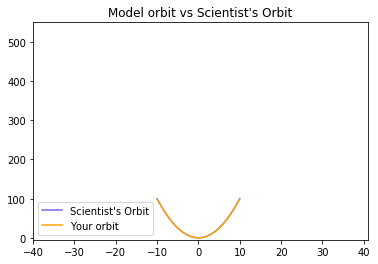

In [0]:
# Predict the twenty minutes orbit
twenty_min_orbit = model.predict(np.arange(-10, 11))

# Plot the twenty minute orbit 
plot_orbit(twenty_min_orbit)

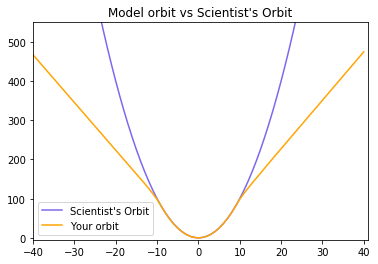

In [0]:
# Predict the eighty minute orbit
eighty_min_orbit = model.predict(np.arange(-40, 41))

# Plot the eighty minute orbit 
plot_orbit(eighty_min_orbit)

## 2. Going Deeper

By the end of this chapter, you will know how to solve binary, multi-class, and multi-label problems with neural networks. All of this by solving problems like detecting fake dollar bills, deciding who threw which dart at a board, and building an intelligent system to water your farm. You will also be able to plot model training metrics and to stop training and save your models when they no longer improve.

### Binary Classification



#### Exploring dollar bills

Your goal is to distinguish between real and fake dollar bills. In order to do this, the dataset comes with 4 variables: *variance,skewness,curtosis and entropy*. These variables are calculated by applying mathematical operations over the dollar bill images. The labels are found in the class variable.

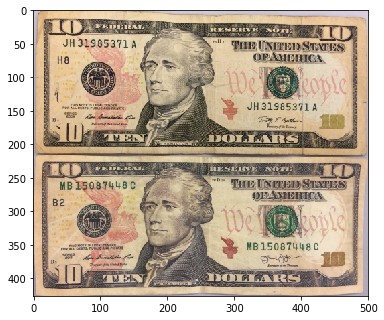

In [0]:
import matplotlib.pyplot as plt
img = plt.imread('dollar_bills.png')
fig= plt.figure(figsize=(6,6))
plt.imshow(img)

You will practice building classification models in Keras with the Banknote Authentication dataset.

In [0]:
banknotes_full = pd.read_csv("banknotes.csv")
print("dataframe dimension: ", banknotes_full.shape)
banknotes_full.head()

dataframe dimension:  (1372, 5)


,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [0]:
#@title
# match dataset
subset = [1240,
 703,
 821,
 1081,
 37,
 167,
 223,
 647,
 325,
 558,
 341,
 1218,
 302,
 1124,
 793,
 80,
 607,
 538,
 255,
 236,
 1209,
 108,
 48,
 1109,
 1338,
 1126,
 336,
 186,
 1259,
 3,
 426,
 19,
 938,
 1051,
 259,
 962,
 1182,
 596,
 1115,
 91,
 409,
 181,
 310,
 309,
 1108,
 1322,
 60,
 575,
 757,
 1314,
 248,
 521,
 1307,
 446,
 729,
 1369,
 1043,
 759,
 375,
 1121,
 1005,
 1159,
 990,
 1331,
 798,
 1083,
 480,
 1076,
 853,
 383,
 494,
 921,
 862,
 424,
 1066,
 311,
 693,
 1068,
 1087,
 301,
 649,
 496,
 982,
 894,
 531,
 101,
 584,
 885,
 280,
 88,
 641,
 686,
 833,
 918,
 1048,
 1186]
print("subset length: ", len(subset))

subset length:  96


In [0]:
banknotes = banknotes_full.iloc[subset,:]
print("dataframe dimension: ", banknotes.shape)
banknotes.head()

dataframe dimension:  (96, 5)


,variace,skewness,curtosis,entropy,class
1240,-3.5510,1.89550,0.186500,-2.44090,1
703,1.3114,4.54620,2.293500,0.22541,0
821,-4.0173,-8.31230,12.454700,-1.43750,1
1081,-5.1190,6.64860,-0.049987,-6.52060,1
37,3.6289,0.81322,1.627700,0.77627,0


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


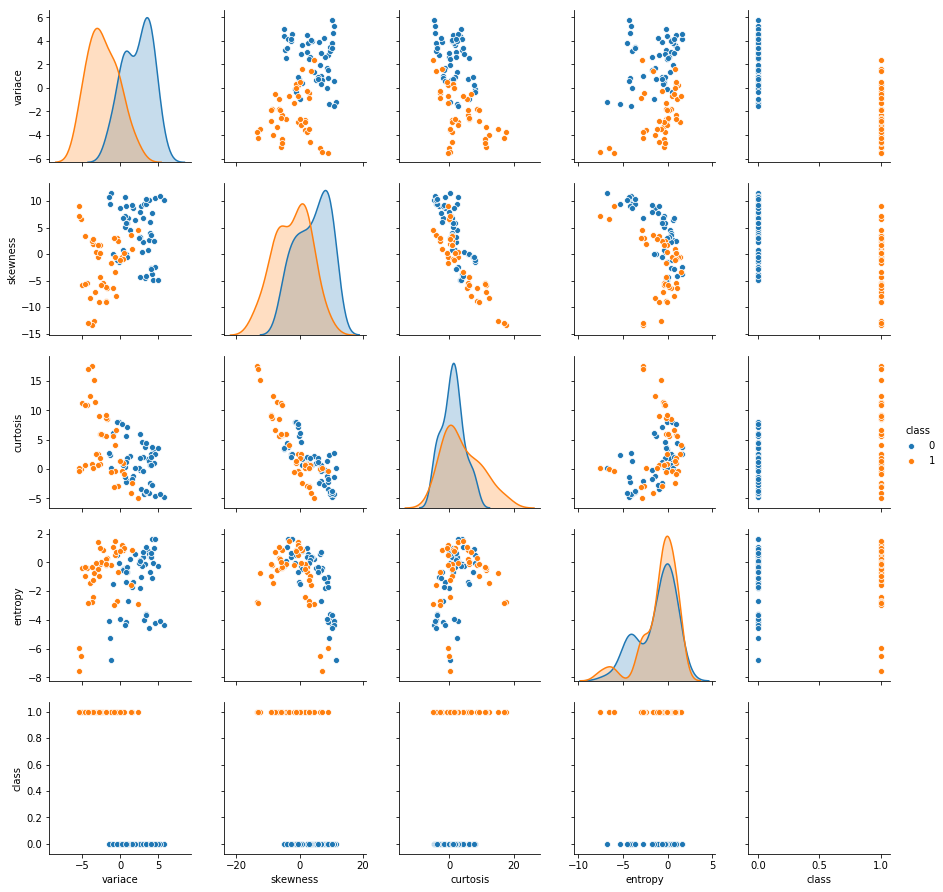

Dataset stats: 
          variace   skewness   curtosis    entropy      class
count  96.000000  96.000000  96.000000  96.000000  96.000000
mean    0.269510   1.319067   2.390346  -1.020493   0.447917
std     2.969490   6.214438   4.864130   2.048927   0.499890
min    -5.490100 -13.458600  -4.988800  -7.564200   0.000000
25%    -1.950825  -3.452625  -0.391650  -1.743325   0.000000
50%     0.357725   1.702000   1.252850  -0.362295   0.000000
75%     2.908975   6.695675   5.614600   0.373472   1.000000
max     5.745600  11.509300  17.593200   1.629700   1.000000
Observations per class: 
 0    53
1    43
Name: class, dtype: int64


In [0]:
# Import seaborn
import seaborn as sns

# Use pairplot and set the hue to be our class
sns.pairplot(banknotes, hue='class') 

# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations of each class
print('Observations per class: \n', banknotes['class'].value_counts())

#### A binary classification model

Now that you know what the Banknote Authentication dataset looks like, we'll build a simple model to distinguish between real and fake bills.

You will perform binary classification by using a single neuron as an output. The input layer will have 4 neurons since we have 4 features in our dataset. The model output will be a value constrained between 0 and 1.

We will interpret this number as the probability of our input variables coming from a fake dollar bill, with 1 meaning we are certain it's fake.

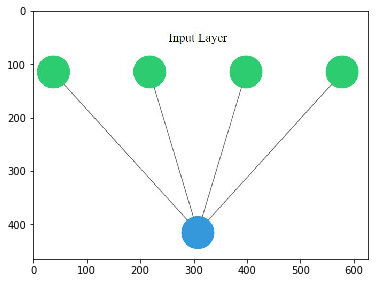

In [0]:
import matplotlib.pyplot as plt
img = plt.imread('model_chapter2_binary_classification.jpeg')
fig= plt.figure(figsize=(6,6))
plt.imshow(img)

In [0]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


#### Is this dollar bill fake ?
You are now ready to train your model and check how well it performs when classifying new bills! 

The dataset has already been partitioned as X_train, X_test,y_train and y_test.

- Train your model for 20 epochs calling .fit(), passing in the training data.
- Check your model accuracy using the .evaluate() method on the test data.
- Print accuracy.

In [0]:
# dataset not available

In [0]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs=20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:',accuracy)

### Multi-class classification


#### A multi-class model

You're going to build a model that predicts who threw which dart only based on where that dart landed! (That is the dart's x and y coordinates.)

This problem is a multi-class classification problem since each dart can only be thrown by one of 4 competitors. So classes are mutually exclusive, and therefore we can build a neuron with as many output as competitors and use the softmax activation function to achieve a total sum of probabilities of 1 over all competitors.

In [0]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 132       
Total params: 10,852
Trainable params: 10,852
Non-trainable params: 0
_________________________________________________________________


#### Prepare your dataset

In the console you can check that our labels, darts.competitor are not yet in a format to be understood by our network. They contain the names of the competitors as strings. You will first turn these competitors into unique numbers,then use the to_categorical() function from keras.utils to turn these numbers into their one-hot encoded representation.

This is useful for multi-class classification problems, since there are as many output neurons as classes and for every observation in our dataset we just want one of the neurons to be activated.

In [0]:
darts = pd.read_csv("darts.csv")
print("dataframe dimension: ", darts.shape) # (800, 3)
darts.head()

dataframe dimension:  (800, 3)


,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


In [0]:
# sanity check
darts.competitor[:5]

0      Steve
1      Susan
2    Michael
3       Kate
4      Steve
Name: competitor, dtype: object

In [0]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

darts.head(5)

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


In [0]:
# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

# Print the label encoded competitors
print('Label encoded competitors: \n',darts.competitor.head())

Label encoded competitors: 
 0    2
1    3
2    1
3    0
4    2
Name: competitor, dtype: int8


In [0]:
# Import to_categorical from keras utils module
from keras.utils import to_categorical

# Use to_categorical on your labels
coordinates = darts.drop(['competitor'], axis=1)
competitors = to_categorical(darts.competitor)

# Now print the to_categorical() result
print('One-hot encoded competitors: \n',competitors)

One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


#### Training on dart throwers

The coordinates and competitors variables you just transformed have been partitioned into coord_train,competitors_train, coord_test and competitors_test. Your model is also loaded. Feel free to visualize your training data or model.summary() in the console.

In [0]:
from sklearn.model_selection import train_test_split
coord_train, coord_test, competitors_train, competitors_test = train_test_split(coordinates, competitors, 
                                                    test_size = 160, random_state=42)


In [0]:
# sanity check
coord_train.shape

(640, 2)

In [0]:
# sanity check
competitors_test[:5]

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [0]:
# Train your model on the training data for 200 epochs
model.fit(coord_train, competitors_train, epochs=200)

Epoch 1/200
640/640 [==============================] - 0s 581us/step - loss: 1.3782 - acc: 0.3406
Epoch 2/200
640/640 [==============================] - 0s 44us/step - loss: 1.3296 - acc: 0.4203
Epoch 3/200
640/640 [==============================] - 0s 42us/step - loss: 1.2637 - acc: 0.4719
Epoch 4/200
640/640 [==============================] - 0s 40us/step - loss: 1.1589 - acc: 0.5422
Epoch 5/200
640/640 [==============================] - 0s 40us/step - loss: 1.0384 - acc: 0.5641
Epoch 6/200
640/640 [==============================] - 0s 46us/step - loss: 0.9385 - acc: 0.5875
Epoch 7/200
640/640 [==============================] - 0s 40us/step - loss: 0.8790 - acc: 0.6328
Epoch 8/200
640/640 [==============================] - 0s 42us/step - loss: 0.8433 - acc: 0.6625
Epoch 9/200
640/640 [==============================] - 0s 43us/step - loss: 0.8246 - acc: 0.6656
Epoch 10/200
640/640 [==============================] - 0s 44us/step - loss: 0.8075 - acc: 0.6734
Epoch 11/200
640/640 [======

In [0]:
# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

160/160 [==============================] - 0s 340us/step
Accuracy: 0.78125


#### Softmax predictions

Your recently trained model is loaded for you. This model is generalizing well!, that's why you got a high accuracy on the test set.

Since you used the softmax activation function, for every input of 2 coordinates provided to your model there's an output vector of 4 numbers. Each of these numbers encodes the probability of a given dart being thrown by one of the 4 possible competitors.

In [0]:
# match dataset
small_idx = [337, 295, 243, 91, 375]
coords_small_test = coordinates.iloc[small_idx]
competitors_small_test = competitors[small_idx]

In [0]:
coords_small_test

,xCoord,yCoord
337,0.209048,-0.077398
295,0.082103,-0.721407
243,0.198165,-0.674646
91,-0.348660,0.035086
375,0.214726,0.183894


In [0]:
competitors_small_test

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

When computing accuracy with the model's .evaluate() method, your model takes the class with the highest probability as the prediction. np.argmax() can help you do this since it returns the index with the highest value in an array.

Use the collection of test throws stored in coords_small_test and np.argmax()to check this out!

In [0]:
# Predict on X_small_test
preds = model.predict(coords_small_test)

# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,competitors_small_test[i]))

Raw Model Predictions                         | True labels
[0.27729267 0.01692407 0.69972223 0.0060611 ] | [0. 0. 1. 0.]
[0.1154827  0.00887728 0.0537801  0.82185996] | [0. 0. 0. 1.]
[0.2872552  0.02206928 0.20104156 0.48963392] | [0. 0. 0. 1.]
[0.8597112  0.05449189 0.0752833  0.01051355] | [1. 0. 0. 0.]
[0.29610407 0.01545617 0.68005925 0.00838048] | [0. 0. 1. 0.]


In [0]:
# Extract the indexes of the highest probable predictions
preds = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{:25} | {}".format(pred,competitors_small_test[i]))

Rounded Model Predictions | True labels
                        2 | [0. 0. 1. 0.]
                        3 | [0. 0. 0. 1.]
                        3 | [0. 0. 0. 1.]
                        0 | [1. 0. 0. 0.]
                        2 | [0. 0. 1. 0.]


### Multi-label classification


#### An irrigation machine

You're going to automate the watering of parcels by making an intelligent irrigation machine. Multi-label classification problems differ from multi-class problems in that each observation can be labeled with zero or more classes. So classes are not mutually exclusive.

To account for this behavior what we do is have an output layer with as many neurons as classes but this time, unlike in multi-class problems, each output neuron has a sigmoid activation function. This makes the output layer able to output a number between 0 and 1 in any of its neurons.

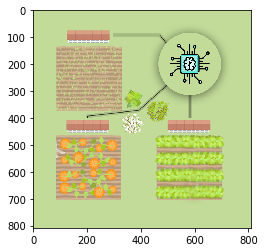

In [0]:
import matplotlib.pyplot as plt
img = plt.imread('mutilabel_dataset.jpg')
fig= plt.figure(figsize=(4,4))
plt.imshow(img)

In [0]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape=(20,), activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with adam and binary crossentropy loss
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                1344      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


#### Training with multiple labels

An output of your multi-label model could look like this: [0.76 , 0.99 , 0.66 ]. If we round up probabilities higher than 0.5, this observation will be classified as containing all 3 possible labels [1,1,1]. For this particular problem, this would mean watering all 3 parcels in your field is the right thing to do given the input sensor measurements.

In [0]:
machine = pd.read_csv("irrigation_machine.csv", index_col=0)
print("dataframe dimension: ", machine.shape)
machine.head()

dataframe dimension:  (2000, 23)


,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,3.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,4.0,5.0,3.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [0]:
sensors = machine.iloc[:, :20]
parcels = machine.iloc[:, 20:]

In [0]:
# sanity check
parcels.head()

,parcel_0,parcel_1,parcel_2
0,0,1,0
1,0,0,0
2,1,1,0
3,0,0,0
4,1,1,0


In [0]:
from sklearn.model_selection import train_test_split
sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors, parcels, 
                                                    test_size = 600, random_state=42)

In [0]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs=100, validation_split=0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

Train on 1120 samples, validate on 280 samples
Epoch 1/100
1120/1120 [==============================] - 0s 48us/step - loss: 0.1348 - acc: 0.9467 - val_loss: 0.2297 - val_acc: 0.8988
Epoch 2/100
1120/1120 [==============================] - 0s 45us/step - loss: 0.1344 - acc: 0.9470 - val_loss: 0.2223 - val_acc: 0.9060
Epoch 3/100
1120/1120 [==============================] - 0s 41us/step - loss: 0.1335 - acc: 0.9488 - val_loss: 0.2268 - val_acc: 0.9060
Epoch 4/100
1120/1120 [==============================] - 0s 41us/step - loss: 0.1361 - acc: 0.9443 - val_loss: 0.2288 - val_acc: 0.9000
Epoch 5/100
1120/1120 [==============================] - 0s 41us/step - loss: 0.1316 - acc: 0.9452 - val_loss: 0.2290 - val_acc: 0.9024
Epoch 6/100
1120/1120 [==============================] - 0s 48us/step - loss: 0.1307 - acc: 0.9497 - val_loss: 0.2254 - val_acc: 0.9071
Epoch 7/100
1120/1120 [==============================] - 0s 45us/step - loss: 0.1308 - acc: 0.9473 - val_loss: 0.2252 - val_acc: 0.9048
E

In [0]:
# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

600/600 [==============================] - 0s 29us/step
Accuracy: 0.895000029404958


### Keras callbacks


#### The history callback

The history callback is returned by default every time you train a model with the .fit() method. To access these metrics you can access the history dictionary inside the returned callback object and the corresponding keys.

In [0]:
def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [0]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

In [0]:
# sensors_train, sensors_test, parcels_train, parcels_test
X_train = sensors_train.values
y_train = parcels_train.values
X_test = sensors_test.values
y_test = parcels_test.values

In [0]:
y_train[:5]

array([[1, 1, 0],
       [0, 1, 0],
       [1, 1, 0],
       [1, 0, 0],
       [0, 1, 0]])

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                1344      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


The irrigation machine model you built in the previous lesson is loaded for you to train, along with its features and labels (X and y). This time you will store the model's historycallback and use the validation_data parameter as it trains.

In [0]:
# Train your model and save it's history
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_test, y_test))

Train on 1400 samples, validate on 600 samples
Epoch 1/50
1400/1400 [==============================] - 0s 58us/step - loss: 0.0806 - acc: 0.9743 - val_loss: 0.3509 - val_acc: 0.8917
Epoch 2/50
1400/1400 [==============================] - 0s 44us/step - loss: 0.0814 - acc: 0.9724 - val_loss: 0.3516 - val_acc: 0.8917
Epoch 3/50
1400/1400 [==============================] - 0s 45us/step - loss: 0.0846 - acc: 0.9698 - val_loss: 0.3552 - val_acc: 0.8917
Epoch 4/50
1400/1400 [==============================] - 0s 44us/step - loss: 0.0787 - acc: 0.9738 - val_loss: 0.3542 - val_acc: 0.8922
Epoch 5/50
1400/1400 [==============================] - 0s 44us/step - loss: 0.0783 - acc: 0.9748 - val_loss: 0.3576 - val_acc: 0.8878
Epoch 6/50
1400/1400 [==============================] - 0s 43us/step - loss: 0.0781 - acc: 0.9752 - val_loss: 0.3665 - val_acc: 0.8894
Epoch 7/50
1400/1400 [==============================] - 0s 47us/step - loss: 0.0803 - acc: 0.9724 - val_loss: 0.3532 - val_acc: 0.8928
Epoch 8/

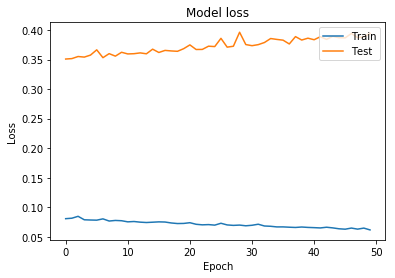

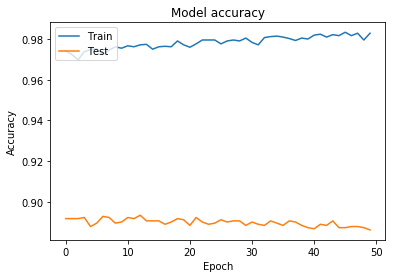

In [0]:
# Plot train vs test loss during training
plot_loss(history.history['loss'], history.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(history.history['acc'], history.history['val_acc'])

In [0]:
# something wrong with data split

#### Early stopping your model

The early stopping callback is useful since it allows for you to stop the model training if it no longer improves after a given number of epochs. To make use of this functionality you need to pass the callback inside a list to the model's callback parameter in the .fit() method.

In [0]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [0]:
y = banknotes_full['class']
X = banknotes_full.iloc[:,:4]

In [0]:
banknotes_full.shape

(1372, 5)

In [0]:
X.head()

,variace,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [0]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 412, random_state=42)

In [0]:
# sanity check
print("X test length: ", len(X_test))
print("y test length: ", len(y_test))
X_test.head()

X test length:  412
y test length:  412


,variace,skewness,curtosis,entropy
430,1.569100,6.3465,-0.1828,-2.4099
588,-0.278020,8.1881,-3.1338,-2.5276
296,0.051979,7.0521,-2.0541,-3.1508
184,-1.755900,11.9459,3.0946,-4.8978
244,2.428700,9.3821,-3.2477,-1.4543


In [0]:
# Import the early stopping callback
from keras.callbacks import EarlyStopping

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_acc', 
                                patience=5)

In [0]:
# Train your model using the early stopping callback
model.fit(X_train, y_train, 
          epochs=1000, validation_data=(X_test, y_test),
          callbacks=[monitor_val_acc])

Train on 960 samples, validate on 412 samples
Epoch 1/1000
960/960 [==============================] - 0s 240us/step - loss: 1.3560 - acc: 0.2896 - val_loss: 0.8944 - val_acc: 0.5073
Epoch 2/1000
960/960 [==============================] - 0s 36us/step - loss: 0.6865 - acc: 0.6333 - val_loss: 0.5409 - val_acc: 0.7451
Epoch 3/1000
960/960 [==============================] - 0s 40us/step - loss: 0.4456 - acc: 0.8198 - val_loss: 0.3875 - val_acc: 0.8665
Epoch 4/1000
960/960 [==============================] - 0s 42us/step - loss: 0.3376 - acc: 0.8979 - val_loss: 0.3157 - val_acc: 0.8932
Epoch 5/1000
960/960 [==============================] - 0s 40us/step - loss: 0.2816 - acc: 0.9240 - val_loss: 0.2741 - val_acc: 0.9102
Epoch 6/1000
960/960 [==============================] - 0s 37us/step - loss: 0.2468 - acc: 0.9365 - val_loss: 0.2467 - val_acc: 0.9175
Epoch 7/1000
960/960 [==============================] - 0s 40us/step - loss: 0.2231 - acc: 0.9448 - val_loss: 0.2274 - val_acc: 0.9223
Epoch 8/

#### A combination of callbacks

Saving your model every time it improves as well as stopping it when it no longer does allows you to worry less about choosing the number of epochs to train for. You can also restore a saved model anytime.

In [0]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor='val_acc', patience=3)

# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_banknote_model.hdf5', save_best_only=True)

# Fit your model for a stupid amount of epochs
history = model.fit(X_train, y_train,
                    epochs=10000000,
                    callbacks=[monitor_val_acc,modelCheckpoint],
                    validation_data=(X_test,y_test))

Train on 960 samples, validate on 412 samples
Epoch 1/10000000
960/960 [==============================] - 0s 46us/step - loss: 0.1238 - acc: 0.9667 - val_loss: 0.1383 - val_acc: 0.9563
Epoch 2/10000000
960/960 [==============================] - 0s 41us/step - loss: 0.1210 - acc: 0.9688 - val_loss: 0.1356 - val_acc: 0.9563
Epoch 3/10000000
960/960 [==============================] - 0s 39us/step - loss: 0.1185 - acc: 0.9708 - val_loss: 0.1332 - val_acc: 0.9612
Epoch 4/10000000
960/960 [==============================] - 0s 41us/step - loss: 0.1162 - acc: 0.9708 - val_loss: 0.1308 - val_acc: 0.9612
Epoch 5/10000000
960/960 [==============================] - 0s 39us/step - loss: 0.1139 - acc: 0.9719 - val_loss: 0.1286 - val_acc: 0.9636
Epoch 6/10000000
960/960 [==============================] - 0s 39us/step - loss: 0.1118 - acc: 0.9719 - val_loss: 0.1266 - val_acc: 0.9636
Epoch 7/10000000
960/960 [==============================] - 0s 38us/step - loss: 0.1099 - acc: 0.9719 - val_loss: 0.1246

## 3. Improving Your Model Performance

In the previous chapters, you've trained a lot of models! You will now learn how to interpret learning curves to understand your models as they train. You will also visualize the effects of activation functions, batch-sizes, and batch-normalization. Finally, you will learn how to perform automatic hyperparameter optimization to your Keras models using sklearn.

### Learning curves

#### Learning the digits

You're going to build a model on the digits dataset, a sample dataset that comes pre-loaded with scikit learn.

You want to distinguish between each of the 10 possible digits given an image, so we are dealing with multi-class classification.

In [0]:
pixels = np.load('digits_pixels.npy')
target = np.load('digits_target.npy')

In [0]:
# one-hot encoding
target = to_categorical(target)
target

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
print("shape of pixels: ", pixels.shape)
print("shape of target: ", target.shape)

shape of pixels:  (1797, 64)
shape of target:  (1797, 10)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pixels, target, 
                                                    test_size = 540, random_state=42)

The dataset has already been partitioned into X_train, y_train, X_test, and y_test using 30% of data as testing data. The labels are one-hot encoded vectors, so you don't need to use Keras to_categorical() function. 

In [0]:
# Instantiate a Sequential model
model = Sequential()

# Input and hidden layer with input_shape, 16 neurons, and relu 
model.add(Dense(16, input_shape=(64,), activation='relu'))

# Output layer with 10 neurons (one per digit) and softmax
model.add(Dense(10, activation='softmax'))

# Compile your model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 1,210
Trainable params: 1,210
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Test if your model works and can process input data
print(model.predict(X_train))

[[3.5721598e-08 1.4350863e-06 7.6034280e-07 ... 2.5707681e-07
  9.8549414e-01 3.6213745e-08]
 [7.6590136e-02 4.9558026e-04 2.8072801e-01 ... 1.2719503e-04
  4.8733532e-01 1.7174106e-06]
 [1.4296717e-07 1.8383820e-03 5.0547026e-04 ... 3.0772811e-05
  4.6330732e-01 1.9615579e-06]
 ...
 [2.6890909e-02 1.5110701e-06 7.2749868e-02 ... 2.7487498e-05
  3.3053225e-01 5.4461357e-06]
 [3.8396334e-05 4.4471599e-05 7.5706118e-03 ... 4.5709541e-05
  7.9010350e-01 4.0362113e-07]
 [2.5416357e-05 4.7472395e-06 1.6632791e-03 ... 5.2107433e-05
  3.1633660e-02 3.8883876e-04]]


#### Is the model overfitting?

You can make use of loaded function plot_loss() to plot training loss against validation loss, you can get both from the history callback.

In [0]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


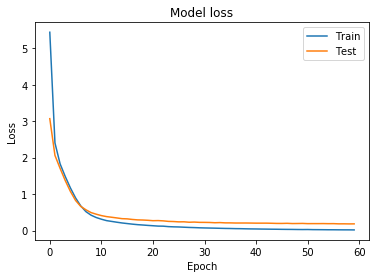

In [0]:
# Train your model for 60 epochs, using X_test and y_test as validation data
history = model.fit(X_train, y_train, epochs=60, 
                    validation_data=(X_test, y_test), verbose=0)
# Extract from the history object loss and val_loss to plot the learning curve
plot_loss(history.history['loss'], history.history['val_loss'])

#### Do we need more data?

In order to keep code to a minimum, various things are already initialized and ready to use:

- The model you just built.
- X_train,y_train,X_test, and y_test.
- The initial_weights of your model, saved after using `model.get_weights()`.
- A defined list of training sizes: `train_sizes`.
- A defined EarlyStopping callback monitoring loss: `early_stop`.
- Two empty lists to store the evaluation results: `train_accs` and `test_accs`.

Train your model on the different training sizes and evaluate the results on `X_test`. End by plotting the results with `plot_results()`.

In [0]:
train_sizes = np.array([ 125,  502,  879, 1255])

In [0]:
train_accs = []
test_accs = []

In [0]:
initial_weights = model.get_weights()
initial_weights

[array([[ 0.00293502,  0.24299604, -0.02188134, ..., -0.13566232,
          0.13645956,  0.15290174],
        [ 0.41715983,  0.48390758,  0.10372701, ..., -0.19496447,
         -0.13221152, -0.01013025],
        [ 0.03428135,  0.02889185,  0.07010088, ...,  0.21035436,
         -0.17453064, -0.0166334 ],
        ...,
        [-0.38453332,  0.09690276,  0.12264817, ..., -0.07643096,
          0.2327844 , -0.22219995],
        [-0.559758  ,  0.18853852,  0.30478606, ...,  0.06670689,
         -0.03023608,  0.23754735],
        [-0.02455655,  0.11777584,  0.3525498 , ..., -0.18649203,
         -0.04469773,  0.003574  ]], dtype=float32),
 array([ 0.14824972, -0.02503471,  0.034083  , -0.06208105, -0.01821597,
         0.02117273, -0.01827347,  0.04144998,  0.0714351 , -0.04335607,
         0.05918625, -0.03307942, -0.00496635,  0.05445221, -0.02766241,
         0.0237883 ], dtype=float32),
 array([[-1.0727651 , -0.5208925 , -1.0331396 ,  0.09351674,  0.21371639,
          0.2269414 , -0.36

In [0]:
early_stop = EarlyStopping(monitor='val_loss')

In [0]:
def plot_results(train_accs,test_accs):
  plt.plot(train_sizes, train_accs, 'o-', label="Training Accuracy")
  plt.plot(train_sizes, test_accs, 'o-', label="Test Accuracy")
  plt.title('Accuracy vs Number of training samples')
  plt.xlabel('Training samples')
  plt.ylabel('Accuracy')
  plt.legend(loc="best")
  plt.show()

In [0]:
for size in train_sizes:
  	# Get a fraction of training data
    X_train_frac, _, y_train_frac, _ = train_test_split(X_train, y_train, 
                                                        train_size=size)
    
    # Set the model weights to the initial weights and fit the model
    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs=50, callbacks=[early_stop], verbose=0)

    # Evaluate and store results for the training fraction and the test set
    train_accs.append(model.evaluate(X_train_frac, y_train_frac, verbose=0)[1])
    test_accs.append(model.evaluate(X_test, y_test, verbose=0)[1])   

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


In [0]:
X_train_frac

array([[ 0.,  0., 10., ...,  1.,  0.,  0.],
       [ 0.,  0.,  3., ..., 16.,  9.,  0.],
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 12.,  5.,  0.],
       [ 0.,  0.,  7., ..., 12.,  1.,  0.],
       [ 0.,  1.,  9., ..., 14.,  5.,  0.]])

In [0]:
y_train_frac

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
train_accs

[1.0, 1.0, 1.0, 1.0]

In [0]:
test_accs

[0.9629629638459948, 0.959259260142291, 0.9629629638459948, 0.9629629638459948]

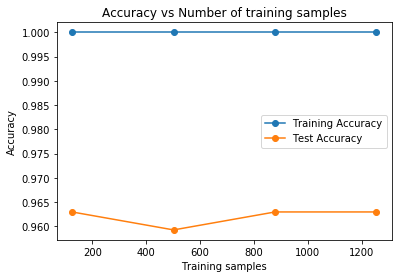

In [0]:
# Plot train_accs vs test_accs
plot_results(train_accs, test_accs) # something wrong

### Activation functions


#### Comparing activation functions

You will build a loop that goes through several activation functions, generates a new model for each and trains it. Storing the history callback in a dictionary will allow you to compare and visualize which activation function performed best in the next exercise!

In [0]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape=(20,), activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with adam and binary crossentropy loss
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [0]:
machine = pd.read_csv("irrigation_machine.csv", index_col=0)
print("dataframe dimension: ", machine.shape)
machine.head()

dataframe dimension:  (2000, 23)


,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,3.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,4.0,5.0,3.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [0]:
sensors = machine.iloc[:, :20]
parcels = machine.iloc[:, 20:]

In [0]:
X = sensors.values
y = parcels.values

In [0]:
# sanity check
X

array([[1., 2., 1., ..., 1., 9., 2.],
       [5., 1., 3., ..., 2., 2., 7.],
       [3., 1., 4., ..., 3., 1., 0.],
       ...,
       [1., 3., 3., ..., 4., 1., 0.],
       [2., 1., 0., ..., 0., 3., 0.],
       [0., 1., 4., ..., 5., 2., 1.]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 600, random_state=42)

In [0]:
# sanity check
len(y_train[0])

3

You will try out different activation functions on the multi-label model you built for your irrigation machine in chapter 2. 

In [0]:
# Train for 100 epochs using a validation split of 0.2
model.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(X_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

Train on 1120 samples, validate on 280 samples
Epoch 1/100
1120/1120 [==============================] - 0s 251us/step - loss: 0.5740 - acc: 0.7324 - val_loss: 0.5025 - val_acc: 0.7500
Epoch 2/100
1120/1120 [==============================] - 0s 43us/step - loss: 0.4403 - acc: 0.7949 - val_loss: 0.4152 - val_acc: 0.8048
Epoch 3/100
1120/1120 [==============================] - 0s 42us/step - loss: 0.3793 - acc: 0.8301 - val_loss: 0.3732 - val_acc: 0.8345
Epoch 4/100
1120/1120 [==============================] - 0s 43us/step - loss: 0.3484 - acc: 0.8435 - val_loss: 0.3514 - val_acc: 0.8464
Epoch 5/100
1120/1120 [==============================] - 0s 49us/step - loss: 0.3263 - acc: 0.8557 - val_loss: 0.3333 - val_acc: 0.8536
Epoch 6/100
1120/1120 [==============================] - 0s 43us/step - loss: 0.3122 - acc: 0.8655 - val_loss: 0.3154 - val_acc: 0.8667
Epoch 7/100
1120/1120 [==============================] - 0s 44us/step - loss: 0.3002 - acc: 0.8732 - val_loss: 0.3048 - val_acc: 0.8643


In [0]:
def get_model(act_function):
  if act_function not in ['relu', 'leaky_relu', 'sigmoid', 'tanh']:
    raise ValueError('Make sure your activation functions are named correctly!')
  print("Finishing with",act_function,"...")
  return ModelWrapper(act_function)

The function get_model() returns a copy of this model and applies the activation function, passed on as a parameter, to its hidden layer.

- Fill up the activation functions array with relu,leaky_relu, sigmoid, and tanh.
- Get a new model for each iteration with get_model() passing the current activation function as a parameter.
- Fit your model providing the train and validation_data, use 20 epochs and set verbose to 0.


In [0]:
# Set a seed
np.random.seed(27)

# Activation functions to try
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}

In [0]:
for act in activations:
  # Get a new model with the current activation
  model = get_model(act)
  # Fit the model
  history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20, verbose=0)
  activation_results[act] = history

Finishing with relu ...


NameError: ignored

#### Comparing activation functions II

The code used in the previous exercise has been executed to obtain theactivation_results with the difference that 100 epochs instead of 20 are used. That way you'll have more epochs to further compare how the training evolves per activation function.

For every history callback of each activation function in activation_results:

- The history.history['val_loss'] has been extracted.
- The history.history['val_acc'] has been extracted.
- Both are saved in two dictionaries: val_loss_per_function and val_acc_per_function.

In [0]:
# Create a dataframe from val_loss_per_function
val_loss= pd.DataFrame(val_loss_per_function)

# Call plot on the dataframe
val_loss.plot()
plt.show()

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(val_acc_per_function)

# Call plot on the dataframe
val_acc.plot()
plt.show()

### Batch size and batch normalization


#### Changing batch sizes

The smaller a batch size, the more weight updates per epoch, but at a cost of a more unstable gradient descent. Specially if the batch size is too small and it's not representative of the entire training set.

Let's see how different batch sizes affect the accuracy of a binary classification model that separates red from blue dots.

- Use get_model() to get a new, already compiled, model, then train your model for 5 epochs with a batch_size of 1.

In [0]:
# Get a fresh new model with get_model
model = get_model()

# Train your model for 5 epochs with a batch size of 1
model.fit(X_train, y_train, epochs=5, batch_size=1)
print("\n The accuracy when using a batch of size 1 is: ",
      model.evaluate(X_test, y_test)[1])

- Now train a new model with batch_size equal to the size of the training set.

In [0]:
model = get_model()

# Fit your model for 5 epochs with a batch of size the training set
model.fit(X_train, y_train, epochs=5, batch_size=X_train.shape[0])
print("\n The accuracy when using the whole training set as a batch was: ",
      model.evaluate(X_test, y_test)[1])

#### Batch normalizing a familiar model

Remember the digits dataset you trained in the first exercise of this chapter?


A multi-class classification problem that you solved using softmax and 10 neurons in your output layer.
You will now build a new deeper model consisting of 3 hidden layers of 50 neurons each, using batch normalization in between layers. 

The kernel_initializer parameter is used to initialize weights in a similar way.

In [0]:
# Import batch normalization from keras layers
from keras.layers import BatchNormalization

# Build your deep network
batchnorm_model = Sequential()
batchnorm_model.add(Dense(50, input_shape=(64,), 
                          activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
batchnorm_model.compile(optimizer='sgd', 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

In [0]:
batchnorm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                3250      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)                200       
_________________________________________________________________
dense_9 (Dense)              (None, 50)                2550      
_________________________________________________________________
batch_normalization_3 (Batch (None, 50)                200       
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

#### Batch normalization effects
Batch normalization tends to increase the learning speed of our models and make their learning curves more stable. Let's see how two identical models with and without batch normalization compare.

In [0]:
# Build your deep network
standard_model = Sequential()
standard_model.add(Dense(50, input_shape=(64,), 
                          activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
standard_model.compile(optimizer='sgd', 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

In [0]:
standard_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 50)                3250      
_________________________________________________________________
dense_16 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                510       
Total params: 8,860
Trainable params: 8,860
Non-trainable params: 0
_________________________________________________________________


In [0]:
pixels = np.load('digits_pixels.npy')
target = np.load('digits_target.npy')

In [0]:
# one-hot encoding
target = to_categorical(target)
target

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
print("shape of pixels: ", pixels.shape)
print("shape of target: ", target.shape)

shape of pixels:  (1797, 64)
shape of target:  (1797, 10)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pixels, target, 
                                                    test_size = 540, random_state=42)

In [0]:
print("X_train dimension: ", X_train.shape)
print("X_test dimension: ", X_test.shape)
print("y_train dimension: ", y_train.shape)
print("y_test dimension: ", y_test.shape)

X_train dimension:  (1257, 64)
X_test dimension:  (540, 64)
y_train dimension:  (1257, 10)
y_test dimension:  (540, 10)


The model you just built batchnorm_model is loaded for you to use. An exact copy of it without batch normalization: standard_model, is available as well. You can check their summary() in the console. X_train, y_train, X_test, and y_test are also loaded so that you can train both models.

You can check the function pasting print(inspect.getsource(compare_histories_acc)) in the console.

In [0]:
def compare_histories_acc(h1,h2):
  plt.plot(h1.history['acc'])
  plt.plot(h1.history['val_acc'])
  plt.plot(h2.history['acc'])
  plt.plot(h2.history['val_acc'])
  plt.title("Batch Normalization Effects")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')
  plt.show()

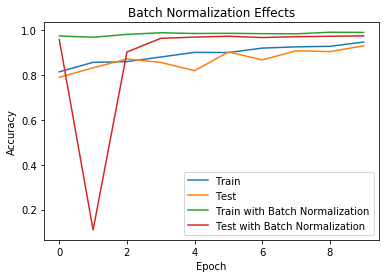

In [0]:
# Train your standard model, storing its history
history1 = standard_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)

# Train the batch normalized model you recently built, store its history
history2 = batchnorm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)

# Call compare_acc_histories passing in both model histories
compare_histories_acc(history1, history2)

**Observation:**

You can see that for this deep model batch normalization proved to be useful, helping the model obtain high accuracy values just over the first 10 training epochs.

### Hyperparameter tuning


#### Preparing a model for tuning

Let's tune the hyperparameters of a binary classification model that does well classifying the breast cancer dataset.

Build a simple create_model() function that receives a learning rate and an activation function as parameters. The Adam optimizer has been imported as an object from keras.optimizers so that you can change its learning rate parameter.

In [0]:
# Creates a model given an activation and learning rate
def create_model(learning_rate=0.01, activation='relu'):
  
  	# Create an Adam optimizer with the given learning rate
  	opt = Adam(lr=learning_rate)
  	
  	# Create your binary classification model  
  	model = Sequential()
  	model.add(Dense(128, input_shape=(30,), activation=activation))
  	model.add(Dense(256, activation=activation))
  	model.add(Dense(1, activation='sigmoid'))
  	
  	# Compile your model with your optimizer, loss, and metrics
  	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  	return model

#### Tuning the model parameters

Since fitting the RandomizedSearchCV would take too long, the results you'd get are printed in the show_results() function. 

- Import KerasClassifier from keras scikit_learn wrappers.
- Use your create_model function appropriately.
- Try out 'relu' and 'tanh', 32, 128, or 256 as batch_size, 50, 100, or 200 epochs, and learning rates of 0.1, 0.01, or 0.001.
- Pass your converted model and the chosen params as you build your RandomizedSearchCV object.

In [0]:
from sklearn.model_selection import RandomizedSearchCV, KFold

In [0]:
def show_results():
  print("Best: 0.975395 using {learning_rate: 0.001, epochs: 50, batch_size: 128, activation: relu} \n 0.956063 (0.013236) with: {learning_rate: 0.1, epochs: 200, batch_size: 32, activation: tanh} \n 0.970123 (0.019838) with: {learning_rate: 0.1, epochs: 50, batch_size: 256, activation: tanh} \n 0.971880 (0.006524) with: {learning_rate: 0.01, epochs: 100, batch_size: 128, activation: tanh} \n 0.724077 (0.072993) with: {learning_rate: 0.1, epochs: 50, batch_size: 32, activation: relu} \n 0.588752 (0.281793) with: {learning_rate: 0.1, epochs: 100, batch_size: 256, activation: relu} \n 0.966608 (0.004892) with: {learning_rate: 0.001, epochs: 100, batch_size: 128, activation: tanh} \n 0.952548 (0.019734) with: {learning_rate: 0.1, epochs: 50, batch_size: 256, activation: relu} \n 0.971880 (0.006524) with: {learning_rate: 0.001, epochs: 200, batch_size: 128, activation: relu}\n 0.968366 (0.004239) with: {learning_rate: 0.01, epochs: 100, batch_size: 32, activation: relu}\n 0.910369 (0.055824) with: {learning_rate: 0.1, epochs: 100, batch_size: 128, activation: relu}")

In [0]:
# Import KerasClassifier from keras wrappers
from keras.wrappers.scikit_learn import KerasClassifier

# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model)

# Define the parameters to try out
params = {'activation':['relu', 'tanh'], 
          'batch_size':[32, 128, 256], 
          'epochs':[50, 100, 200], 
          'learning_rate':[0.1, 0.01, 0.001]}

# Create a randomize search cv object and fit it on the data to obtain the results
random_search = RandomizedSearchCV(model, 
                                   param_distributions=params, 
                                   cv=KFold(3))

# random_search.fit(X,y) takes too long! But would start the search.
show_results()

Best: 0.975395 using {learning_rate: 0.001, epochs: 50, batch_size: 128, activation: relu} 
 0.956063 (0.013236) with: {learning_rate: 0.1, epochs: 200, batch_size: 32, activation: tanh} 
 0.970123 (0.019838) with: {learning_rate: 0.1, epochs: 50, batch_size: 256, activation: tanh} 
 0.971880 (0.006524) with: {learning_rate: 0.01, epochs: 100, batch_size: 128, activation: tanh} 
 0.724077 (0.072993) with: {learning_rate: 0.1, epochs: 50, batch_size: 32, activation: relu} 
 0.588752 (0.281793) with: {learning_rate: 0.1, epochs: 100, batch_size: 256, activation: relu} 
 0.966608 (0.004892) with: {learning_rate: 0.001, epochs: 100, batch_size: 128, activation: tanh} 
 0.952548 (0.019734) with: {learning_rate: 0.1, epochs: 50, batch_size: 256, activation: relu} 
 0.971880 (0.006524) with: {learning_rate: 0.001, epochs: 200, batch_size: 128, activation: relu}
 0.968366 (0.004239) with: {learning_rate: 0.01, epochs: 100, batch_size: 32, activation: relu}
 0.910369 (0.055824) with: {learning_

#### Training with cross-validation

Time to train your model with the best parameters found: 0.001 for the learning rate, 50 epochs,a 128 batch_size and relu activations.

In this exercise you do pass the best epochs and batchsize values found for your model to the KerasClassifier object so that they are used when performing crossvalidation.

In [0]:
def create_model():
  opt = Adam(lr=0.001)
  model = Sequential()
  model.add(Dense(128,input_shape=(30,),activation='relu'))
  model.add(Dense(256,activation='tanh'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
  return model

The create_model() function has been redefined so that it now creates a model with those parameters. X and y are loaded for you to use as features and labels.

In [0]:
def cross_val_score(model,X,y,cv):
  return np.array([0.9736842 , 0.96842105, 0.97354497])

In [0]:
# Import KerasClassifier from keras wrappers
from keras.wrappers.scikit_learn import KerasClassifier

# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=128, verbose=0)

# Calculate the accuracy score for each fold
kfolds = cross_val_score(model, X, y, cv=3)

# Print the mean accuracy
print('The mean accuracy was:', kfolds.mean())

# Print the accuracy standard deviation
print('With a standard deviation of:', kfolds.std())

The mean accuracy was: 0.9718834066666666
With a standard deviation of: 0.002448915612216046


## 4. Advanced Model Architectures

It's time to get introduced to more advanced architectures! You will create an autoencoder to reconstruct noisy images, visualize convolutional neural network activations, use deep pre-trained models to classify images and learn more about recurrent neural networks and working with text as you build a network that predicts the next word in a sentence.

#### It's a flow of tensors

If you have already built a model, you can use the model.layers and the keras.backend to build functions that, provided with a valid input tensor, return the corresponding output tensor.

In [0]:
banknotes_full = pd.read_csv("banknotes.csv")
print("dataframe dimension: ", banknotes_full.shape)
banknotes_full.head()

dataframe dimension:  (1372, 5)


,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [0]:
y = banknotes_full['class']
X = banknotes_full.iloc[:,:4]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 412, random_state=42)

In [0]:
print("X_train dimension: ", X_train.shape)
print("X_test dimension: ", X_test.shape)
print("y_train dimension: ", y_train.shape)
print("y_test dimension: ", y_test.shape)

X_train dimension:  (960, 4)
X_test dimension:  (412, 4)
y_train dimension:  (960,)
y_test dimension:  (412,)


X_test from the Banknote Authentication dataset 

In [0]:
model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Train your model using the early stopping callback
model.fit(X_train, y_train, 
          epochs=1000, validation_data=(X_test, y_test))

Train on 960 samples, validate on 412 samples
Epoch 1/1000
960/960 [==============================] - 0s 433us/step - loss: 1.5840 - acc: 0.7198 - val_loss: 1.1158 - val_acc: 0.7767
Epoch 2/1000
960/960 [==============================] - 0s 48us/step - loss: 0.7839 - acc: 0.8354 - val_loss: 0.3437 - val_acc: 0.8592
Epoch 3/1000
960/960 [==============================] - 0s 50us/step - loss: 0.2414 - acc: 0.8958 - val_loss: 0.2218 - val_acc: 0.9199
Epoch 4/1000
960/960 [==============================] - 0s 56us/step - loss: 0.1879 - acc: 0.9312 - val_loss: 0.1898 - val_acc: 0.9320
Epoch 5/1000
960/960 [==============================] - 0s 56us/step - loss: 0.1605 - acc: 0.9469 - val_loss: 0.1674 - val_acc: 0.9515
Epoch 6/1000
960/960 [==============================] - 0s 50us/step - loss: 0.1408 - acc: 0.9563 - val_loss: 0.1491 - val_acc: 0.9636
Epoch 7/1000
960/960 [==============================] - 0s 47us/step - loss: 0.1259 - acc: 0.9625 - val_loss: 0.1356 - val_acc: 0.9660
Epoch 8/

- Import keras.backend as K.
- Use model.layers to get the input and output of the first layer.
- Use K.function() to define a function that maps inp to out.
- Print the results of passing X_test through the 1st layer.

In [0]:
# Import keras backend
import keras.backend as K

# Input tensor from the 1st layer of the model
inp = model.layers[0].input

# Output tensor from the 1st layer of the model
out = model.layers[0].output

# Define a function from inputs to outputs
inp_to_out = K.function([inp], [out])

# Print the results of passing X_test through the 1st layer
print(inp_to_out([X_test]))

[array([[6.14894629e-01, 7.61300325e-04],
       [9.68268692e-01, 5.75708151e-02],
       [7.99740374e-01, 3.18208337e-02],
       [5.31867445e-02, 3.46302986e-05],
       [9.95973527e-01, 2.79307365e-04],
       [1.36859745e-01, 1.39060616e-03],
       [8.21160614e-01, 6.01500273e-04],
       [9.87500906e-01, 1.22457743e-04],
       [7.59605765e-01, 6.38723373e-04],
       [6.65973008e-01, 2.45451927e-04],
       [9.67240214e-01, 4.78894442e-01],
       [9.14739013e-01, 9.35325980e-01],
       [2.08085775e-03, 1.08861923e-03],
       [1.88320875e-04, 9.13590312e-01],
       [6.79379702e-03, 2.38522887e-03],
       [9.63225484e-01, 3.77891332e-01],
       [5.14933169e-02, 8.99239063e-01],
       [7.54911304e-02, 9.09666896e-01],
       [0.00000000e+00, 8.68812919e-01],
       [9.20775533e-03, 6.37169003e-01],
       [9.82546568e-01, 2.04950571e-04],
       [1.29016191e-01, 3.99261713e-04],
       [2.76542604e-02, 7.25970149e-01],
       [9.97936606e-01, 6.97970390e-05],
       [3.27991

#### Neural separation

You will make use of the inp_to_out() function, built in the previous exercise, to visualize how neurons learn to separate real from fake dollar bills. 

In [0]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [0]:
y = banknotes_full['class']
X = banknotes_full.iloc[:,:4]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 275, random_state=42)

In [0]:
print("X_train dimension: ", X_train.shape)
print("X_test dimension: ", X_test.shape)
print("y_train dimension: ", y_train.shape)
print("y_test dimension: ", y_test.shape)

X_train dimension:  (1097, 4)
X_test dimension:  (275, 4)
y_train dimension:  (1097,)
y_test dimension:  (275,)


You will visualize the output of the first layer of the Banknote Authentication model as epochs go by.

The model you built in chapter 2 for this dataset is ready for you to use, just like X_train,X_test,y_train,y_test.

- Use the previously defined inp_to_out() function to get the outputs of the first layer when fed with the validation features.
- Use the model.evaluate() method to obtain the validation accuracy at each epoch, it will be used for the plot's title.

275/275 [==============================] - 0s 37us/step


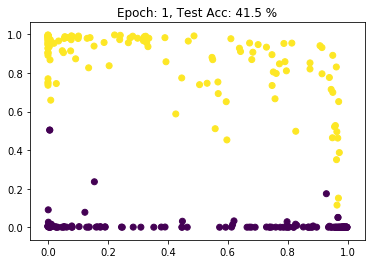

275/275 [==============================] - 0s 35us/step


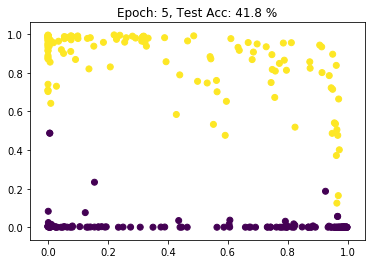

275/275 [==============================] - 0s 33us/step


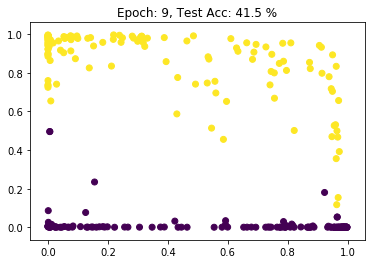

275/275 [==============================] - 0s 33us/step


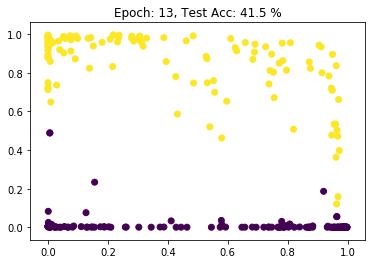

275/275 [==============================] - 0s 52us/step


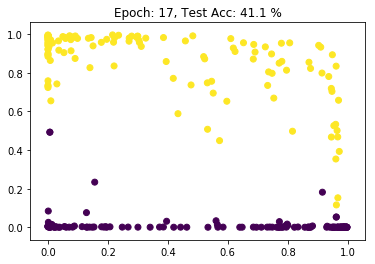

275/275 [==============================] - 0s 36us/step


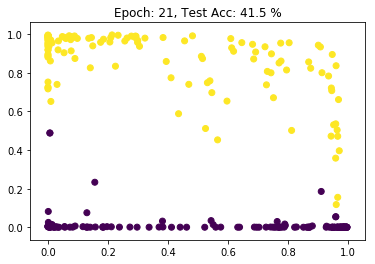

In [0]:
for i in range(0, 21):
  	# Train model for 1 epoch
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    if i%4==0: 
      # Get the output of the first layer
      layer_output = inp_to_out([X_test])[0]
      
      # Evaluate model accuracy for this epoch
      test_accuracy = model.evaluate(X_test, y_test)[1] 
      
      # Plot 1st vs 2nd neuron output
      plt.figure()
      plt.scatter(layer_output[:, 0], layer_output[:, 1], c=y_test)
      plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i+1, test_accuracy * 100.0)) 
      plt.show()

#### Building an autoencoder
Autoencoders have several interesting applications like anomaly detection or image denoising. They **aim at producing an output identical to its inputs**. The input will be compressed into a lower dimensional space, encoded. The model then learns to decode it back to its original form.

In [0]:
# Start with a sequential model
autoencoder = Sequential()

# Add a dense layer with the original image as input
autoencoder.add(Dense(32, input_shape=(784, ), activation="relu"))

# Add an output layer with as many nodes as the image
autoencoder.add(Dense(784, activation="sigmoid"))

# Compile your model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Take a look at your model structure
autoencoder.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_24 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


#### De-noising like an autoencoder

First, you will build a model that encodes images, and you will check how different digits are represented with show_encodings(). You can change the number parameter of this function to check other digits in the console.

Then, you will apply your autoencoder to noisy images from MNIST, it should be able to clean the noisy artifacts.

In [0]:
def show_encodings(encoded_imgs,number=4):
    n = 5  # how many digits we will display
    original = X_test_noise
    original = original[np.where(y_test == number)]
    encoded_imgs = encoded_imgs[np.where(y_test==number)]
    plt.figure(figsize=(20, 4))
    #plt.title('Original '+str(number)+' vs Encoded representation')
    for i in range(min(n,len(original))):
        # display original imgs
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display encoded imgs
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(np.tile(encoded_imgs[i],(32,1)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [0]:
X_test_noise = np.load('X_test_MNIST_noise.npy')
X_test_noise

array([[0.        , 0.13035677, 0.        , ..., 0.66030355, 0.01190928,
        0.        ],
       [0.        , 0.        , 0.27230328, ..., 0.21741264, 0.62852273,
        0.17289227],
       [0.        , 0.12998193, 0.        , ..., 0.        , 0.45022928,
        0.03336608],
       ...,
       [0.08544555, 0.21401904, 0.41607752, ..., 0.        , 0.        ,
        0.1249689 ],
       [0.60191236, 0.74493222, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.45770842, ..., 0.24661695, 0.        ,
        0.02334947]])

X_test_noise is loaded in your workspace. 

In [0]:
# Build your encoder
encoder = Sequential()
encoder.add(autoencoder.layers[0])

# Encode the images and show the encodings
preds = encoder.predict(X_test_noise)
show_encodings(preds)

<Figure size 1440x288 with 0 Axes>

- Predict on X_test_noise with your autoencoder.
- Plot noisy vs decoded images with compare_plot().

In [0]:
def compare_plot(original,decoded_imgs):
    n = 4  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.title('Noisy vs Decoded images')
    plt.show()

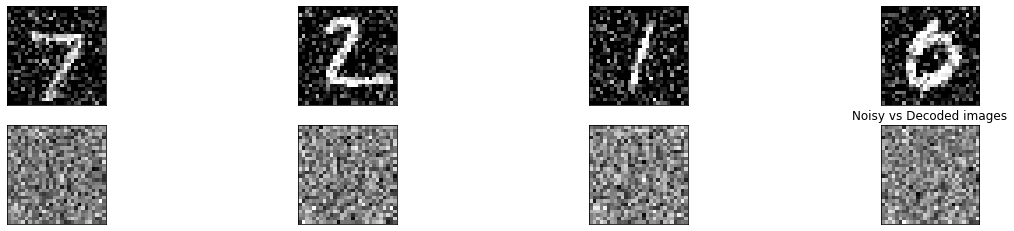

In [0]:
# Predict on the noisy images with your autoencoder
decoded_imgs = autoencoder.predict(X_test_noise)

# Plot noisy vs decoded images
compare_plot(X_test_noise, decoded_imgs)

### Intro to CNNs


#### Building a CNN model

You're going to build a shallow convolutional model that classifies the MNIST dataset of digits. The same one you de-noised with your autoencoder!. The images are 28x28 pixels and just have one channel.

- Import the Conv2D and Flatten layers and instantiate your model.
- Add a first convolutional layer with 32 filters of size 3x3 and the corresponding 3D tuple as input_shape.
- Add a second convolutional layer with 16 filters of size 3x3 with relu activation.
- Flatten the previous layer output to create a one-dimensional vector.

In [0]:
# Import the Conv2D and Flatten layers and instantiate model
from keras.layers import Conv2D,Flatten
model = Sequential()

# Add a convolutional layer of 32 filters of size 3x3 
model.add(Conv2D(32, input_shape=(28, 28, 1), kernel_size=3, activation='relu'))

# Add a convolutional layer of 16 filters of size 3x3
model.add(Conv2D(16, kernel_size=3, activation='relu'))

# Flatten the previous layer output 
model.add(Flatten())

# Add as many outputs as classes with softmax activation
model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                92170     
Total params: 97,114
Trainable params: 97,114
Non-trainable params: 0
_________________________________________________________________


#### Looking at convolutions

The idea behind it is to get the outputs of each of the convolutional layers, so that we visualize the results of the convolutions.

In [0]:
X_test = np.load('X_test_MNIST.npy')
X_test.shape

(100, 784)

In [0]:
X_test = X_test.reshape(100, 28, 28, 1)
X_test.shape

(100, 28, 28, 1)

In [0]:
y_test = np.load('y_test_MNIST.npy')
y_test.shape

(100,)

To do so, you will build a new model with the Keras Model object, which takes in a list of inputs and a list of outputs. The outputs we will provide to this model are the convolutional layer outputs when given an MNIST digit as the input image.

In [0]:
from keras.models import Model

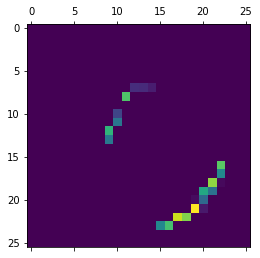

In [0]:
# Obtain a reference to the outputs of the first two layers 
layer_outputs = [layer.output for layer in model.layers[:2]]

# Build a model using the model input and the layer outputs
activation_model = Model(inputs = model.input, outputs=layer_outputs)

# Use this model to predict on X_test
activations = activation_model.predict(X_test)

# Grab the activations of the first convolutional layer
first_layer_activation = activations[0]

# Plot the 10th digit of X_test for the 14th neuron filter
plt.matshow(first_layer_activation[10, :, :, 14], cmap='viridis')
plt.show()

#### Preparing your input image

When using an already trained model like ResNet50, we need to make sure that we fit the network the way it was originally trained. So if we want to use a trained model on our custom images, these images need to have the same dimensions as the one used in the original model.

The original **ResNet50** model was trained with images of size **224x224** pixels and a number of preprocessing operations; like the subtraction of the mean pixel value in the training set for all training images.

You will go over these preprocessing steps as you prepare this dog's (named Ivy) image into one that can be classified by ResNet50.

In [0]:
# edit accordingly
img_path = 'dog.png'

In [0]:
# Import image and preprocess_input
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

# Load the image with the right target size for your model
img = image.load_img(img_path, target_size=(224, 224))

# Turn it into an array
img_array = image.img_to_array(img)

# Expand the dimensions of the image
img_expanded = np.expand_dims(img_array, axis=0)

# Pre-process the img in the same way original images were
img_ready = preprocess_input(img_expanded)

In [0]:
img_ready.shape

(1, 224, 224, 3)

In [0]:
img_ready[0][0][0]

array([23.060997, 15.221001, 11.32    ], dtype=float32)

#### Using a real world model

ResNet50 is a model trained on the Imagenet dataset that is able to distinguish between 1000 different objects.

In [0]:
from keras.applications.resnet50 import ResNet50, decode_predictions

ResNet50 and decode_predictions have both been imported from keras.applications.resnet50 for you.

In [0]:
# Instantiate a ResNet50 model with imagenet weights
model = ResNet50(weights='imagenet')

# Predict with ResNet50 on your already processed img
preds = model.predict(img_ready)

# Decode predictions
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02088364', 'beagle', 0.88292086), ('n02089867', 'Walker_hound', 0.08215906), ('n02089973', 'English_foxhound', 0.0262022)]


In [0]:
preds.shape

(1, 1000)

In [0]:
preds[0][0]

4.299314e-08

### Intro to LSTMs


#### Text prediction with LSTMs

During the following exercises you will build an LSTM model that is able to predict the next word using a small text dataset.

In [0]:
text = 'it is not the strength of the body but the strength of the spirit it is useless to meet revenge with revenge it will heal nothing even the smallest person can change the course of history all we have to decide is what to do with the time that is given us the burned hand teaches best after that advice about fire goes to the heart'

In [0]:
# Split text into an array of words
words = text.split()
words[:5]

['it', 'is', 'not', 'the', 'strength']

In [0]:
# Make lines of 4 words each, moving one word at a time
lines = []
for i in range(4, len(words)):
  lines.append(' '.join(words[i-4:i]))
lines[:5]

['it is not the',
 'is not the strength',
 'not the strength of',
 'the strength of the',
 'strength of the body']

In [0]:
from keras.preprocessing.text import Tokenizer

In [0]:
# Instantiate a Tokenizer, then fit it on the lines
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)

# Turn lines into a sequence of numbers
sequences = tokenizer.texts_to_sequences(lines)
print("Lines: \n {} \n Sequences: \n {}".format(lines[:5],sequences[:5]))

Lines: 
 ['it is not the', 'is not the strength', 'not the strength of', 'the strength of the', 'strength of the body'] 
 Sequences: 
 [[5, 2, 42, 1], [2, 42, 1, 6], [42, 1, 6, 4], [1, 6, 4, 1], [6, 4, 1, 10]]


#### Build your LSTM model

Your model will be trained on the first three words of each sequence, predicting the 4th one. You are going to use an Embedding layer that will essentially learn to turn words into vectors. These vectors will then be passed to a simple LSTM layer. Our output is a Dense layer with as many neurons as words in the vocabulary and softmax activation. This is because we want to obtain the highest probable next word out of all possible words.

In [0]:
vocab_size = 44

In [0]:
# Import the Embedding, LSTM and Dense layer
from keras.layers import Embedding, LSTM, Dense

model = Sequential()

# Add an Embedding layer with the right parameters
model.add(Embedding(input_dim=vocab_size, output_dim=8, input_length=3))

# Add a 32 unit LSTM layer
model.add(LSTM(32))

# Add a hidden Dense layer of 32 units and an output layer of vocab_size with softmax
model.add(Dense(32, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 3, 8)              352       
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                5248      
_________________________________________________________________
dense_27 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_28 (Dense)             (None, 44)                1452      
Total params: 8,108
Trainable params: 8,108
Non-trainable params: 0
_________________________________________________________________


#### Decode your predictions

It's time to define a function that decodes its predictions.

The tokenizer you previously created and fitted, is loaded for you. You will be making use of its internal index_word dictionary to turn the model's integer prediction into the word it represents. Since you are predicting on a model with the softmax function,argmax() is used to obtain the position in the output layer with the highest probability. This is the most probable word, since the output layer of your model has as many outputs as possible words.

In [0]:
def predict_text(test_text):
  if len(test_text.split())!=3:
    print('Text input should be 3 words!')
    return False
  
  # Turn the test_text into a sequence of numbers
  test_seq = tokenizer.texts_to_sequences([test_text])
  test_seq = np.array(test_seq)
  
  # Get the model prediction from the test_seq
  pred = model.predict(test_seq).argmax(axis=1)[0]
  
  # Return the word associated to the prediction
  return tokenizer.index_word[pred]

#### Test your model!

Try out these strings on your LSTM model:

- 'meet revenge with'
- 'the course of'
- 'strength of the'

In [0]:
predict_text('meet revenge with')

'revenge'

In [0]:
predict_text('the course of') # correct ans: history

'will'

In [0]:
predict_text('strength of the') # correct ans: spirit

'all'